In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns





In [4]:
reg=pd.read_excel(r'C:\Users\umang\Documents\Work\Ravi sent\PM\Cig Consumption data.xls')

reg.head()

,State,Age,HS,Income,Black,Female,Price,Sales
0,AL,27.0,41.3,2948,26.2,51.7,42.7,89.8
1,AK,22.9,66.1,4644,3.0,45.7,41.8,121.3
2,Az,26.3,58.1,3665,3.0,50.8,38.5,115.2
3,AR,29.1,39.9,2878,18.3,51.5,38.8,100.3
4,CA,28.1,62.6,4493,7.0,50.8,39.7,123.0


In [5]:
reg.corr()

,Age,HS,Income,Black,Female,Price,Sales
Age,1.000000,-0.097761,0.256581,-0.040326,0.553032,0.243839,0.226830
HS,-0.097761,1.000000,0.530641,-0.482835,-0.412948,0.055747,0.066885
Income,0.256581,0.530641,1.000000,0.027566,-0.068827,0.214502,0.326633
Black,-0.040326,-0.482835,0.027566,1.000000,0.449406,-0.129045,0.179272
Female,0.553032,-0.412948,-0.068827,0.449406,1.000000,0.019819,0.146417
Price,0.243839,0.055747,0.214502,-0.129045,0.019819,1.000000,-0.300820
Sales,0.226830,0.066885,0.326633,0.179272,0.146417,-0.300820,1.000000


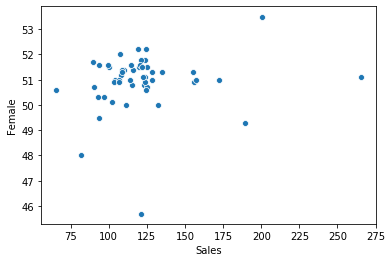

In [6]:
sns.scatterplot(reg["Sales"], reg["Female"])

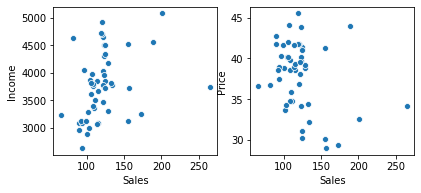

In [10]:
plt.figure(figsize=(10,6))
plt.subplot(231)
sns.scatterplot(reg["Sales"], reg["Income"])
plt.subplot(232)
sns.scatterplot(reg["Sales"], reg["Price"])

In [11]:
from statsmodels.formula.api import ols

In [12]:
model=ols('Sales~Age+HS+Income+Black+Female+Price', data=reg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     3.438
Date:                Tue, 15 Mar 2022   Prob (F-statistic):            0.00717
Time:                        17:56:46   Log-Likelihood:                -238.84
No. Observations:                  51   AIC:                             491.7
Df Residuals:                      44   BIC:                             505.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.9793    246.288      0.406      0.6

In [13]:
pred_val=model.fittedvalues.copy()
observed=reg["Sales"].values.copy()
resid=observed-pred_val

In [14]:
resid

0      -4.413944
1      14.040878
2       4.712876
3     -12.390096
4      -8.238284
5     -12.723451
6      -4.590035
7      31.325612
8      14.394316
9      -0.690315
10    -10.344743
11    -48.579667
12    -16.946272
13     -5.652396
14     -4.007959
15    -13.389888
16     -9.492152
17     21.635673
18     16.053424
19     19.528917
20    -22.195582
21     -1.656847
22      7.401609
23     -6.099843
24     -6.829055
25    -13.054271
26    -11.781657
27    -26.766676
28     71.782744
29    132.367538
30    -18.377863
31     11.876742
32    -21.044960
33     31.050678
34     -5.719885
35     -5.086248
36     -7.405108
37      3.343510
38    -11.350372
39     -0.497423
40    -11.893985
41    -12.169570
42     -2.911714
43      4.116315
44    -27.143338
45     18.073701
46    -22.796693
47    -20.177327
48      8.347300
49     -5.565946
50      1.931736
dtype: float64

Text(0, 0.5, 'pred_value')

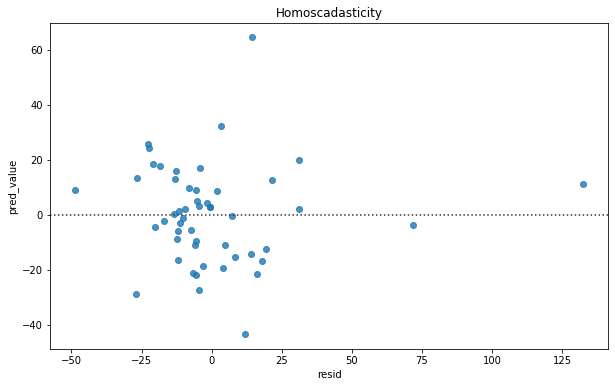

In [15]:
# Residual plot

fig,ax=plt.subplots(figsize=(10,6))
sns.residplot(resid, pred_val)
plt.title("Homoscadasticity")
plt.xlabel("resid")
plt.ylabel("pred_value")

In [17]:
a = model.rsquared
print(a)

0.31918528894030995


In [21]:
inputs=reg.columns[1:-1].values.copy()
inputs

array(['Age', 'HS', 'Income', 'Black', 'Female', 'Price'], dtype=object)

In [32]:
# VIF Age
m1=ols('Age~HS+Income+Black+Female+Price', data=reg).fit()
r2_Age=m1.rsquared
Age_vif=1/(1-r2_Age)
Age_vif

# VIF HS
m2=ols('HS~Age+Income+Black+Female+Price', data=reg).fit()
r2_HS=m2.rsquared
HS_vif=1/(1-r2_HS)
HS_vif

# VIF Income
m3=ols('Income~Age+HS+Black+Female+Price', data=reg).fit()
r2_Income=m3.rsquared
Income_vif=1/(1-r2_Income)
Income_vif

# VIF Price
m4=ols('Price~Age+HS+Black+Female+Income', data=reg).fit()
r2_Price=m4.rsquared
Price_vif=1/(1-r2_Price)
Price_vif


1.1296329327912693

In [34]:
print(Age_vif)
print(HS_vif)
print(Income_vif)
print(Price_vif)


2.2958413606563886
2.5436826482320654
2.271081970206082
1.1296329327912693


<function matplotlib.pyplot.show(*args, **kw)>

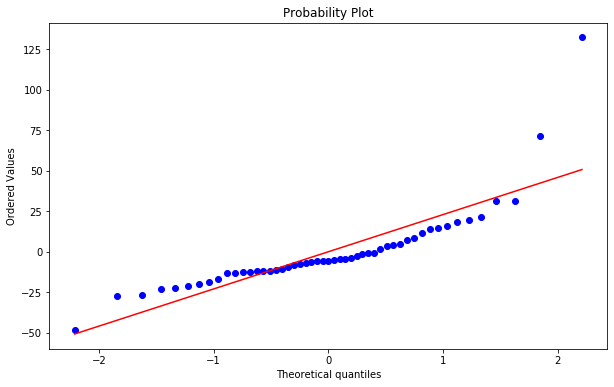

In [37]:
# Npp curve

fig,ax=plt.subplots(figsize=(10,6))
stats.probplot(resid, dist='norm', plot=plt)
plt.show

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# the independent variables set

X=reg.iloc[:,1:-1]   # choosing all the columns except the dep var and the char variable

# VIF dataframe

vif_data=pd.DataFrame()   #creating an empty DF to be able to store vif values against their column names. This will give 2 columns- column name and its VIF value
vif_data["feature"]=X.columns  # storing column names as "Features" in new

# calculating VIF for each feature

vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]   # storing VIF values as "VIF" in new
                
print(vif_data)

  feature         VIF
0     Age  408.025983
1      HS  113.933490
2  Income   93.244844
3   Black    3.264665
4  Female  548.461309
5   Price   97.852069


In [51]:
reg.values

array([['AL', 27.0, 41.3, 2948, 26.2, 51.7, 42.7, 89.8],
       ['AK', 22.9, 66.1, 4644, 3.0, 45.7, 41.8, 121.3],
       ['Az', 26.3, 58.1, 3665, 3.0, 50.8, 38.5, 115.2],
       ['AR', 29.1, 39.9, 2878, 18.3, 51.5, 38.8, 100.3],
       ['CA', 28.1, 62.6, 4493, 7.0, 50.8, 39.7, 123.0],
       ['co', 26.2, 63.9, 3855, 3.0, 50.7, 31.1, 124.8],
       ['CT', 29.1, 56.0, 4917, 6.0, 51.5, 45.5, 120.0],
       ['DE', 26.8, 54.6, 4524, 14.3, 51.3, 41.3, 155.0],
       ['DC', 28.4, 55.2, 5079, 71.1, 53.5, 32.6, 200.4],
       ['FL', 32.3, 52.6, 3738, 15.3, 51.8, 43.8, 123.6],
       ['GA', 25.9, 40.6, 3354, 25.9, 51.4, 35.8, 109.9],
       ['HI', 25.0, 61.9, 4623, 1.0, 48.0, 36.7, 82.1],
       ['ID', 26.4, 59.5, 3290, 0.3, 50.1, 33.6, 102.4],
       ['IL', 28.6, 52.6, 4507, 12.8, 51.5, 41.4, 124.8],
       ['IN', 27.2, 52.9, 3772, 6.9, 51.3, 32.2, 134.6],
       ['1A', 28.8, 59.0, 3751, 1.2, 51.4, 38.5, 108.5],
       ['KS', 28.7, 59.9, 3853, 4.8, 51.0, 38.9, 114.0],
       ['KY', 27.5, 38.5, 

In [78]:
# dropping Female var, checking the VIF again

reg1=reg.drop(["Female"],axis=1)
X=reg1.iloc[:,1:-1]
X

# VIF dataframe

vif_data=pd.DataFrame()   #creating an empty DF to be able to store vif values against their column names. This will give 2 columns- column name and its VIF value
vif_data["feature"]=X.columns  # storing column names as "Features" in new

# calculating VIF for each feature

vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]   # storing VIF values as "VIF" in new
                
print(vif_data)


  feature         VIF
0     Age  109.732880
1      HS   74.295801
2  Income   76.848793
3   Black    2.176689
4   Price   87.072288


In [131]:
import pandas as pd

people={"name":["J", "dsd", "adsasd", "sdasd"],
   "age":[30,40,34,60],
   "lname":["dsad","adas","asdsa","asda"]}


In [132]:
df=pd.DataFrame(people)

In [7]:
df

,name,age,lname
0,J,30,dsad
1,dsd,40,adas
2,adsasd,34,asdsa
3,sdasd,60,asda


In [8]:
df["name"]

0         J
1       dsd
2    adsasd
3     sdasd
Name: name, dtype: object

In [9]:
df["age"]

0    30
1    40
2    34
3    60
Name: age, dtype: int64

In [10]:
df["lname"]

0     dsad
1     adas
2    asdsa
3     asda
Name: lname, dtype: object

In [15]:
df[["name", "lname"]]

,name,lname
0,J,dsad
1,dsd,adas
2,adsasd,asdsa
3,sdasd,asda


In [16]:
df.iloc[1]

name      dsd
age        40
lname    adas
Name: 1, dtype: object

In [19]:
df.iloc[[1,2]]

,name,age,lname
1,dsd,40,adas
2,adsasd,34,asdsa


In [20]:
df.iloc[[1,2],2]

1     adas
2    asdsa
Name: lname, dtype: object

In [21]:
df

,name,age,lname
0,J,30,dsad
1,dsd,40,adas
2,adsasd,34,asdsa
3,sdasd,60,asda


In [22]:
df.loc[[1,2],"lname"]

1     adas
2    asdsa
Name: lname, dtype: object

In [23]:
df.loc[2,"lname"]

'asdsa'

In [24]:
df.loc[[0,1],["age","lname"]]

,age,lname
0,30,dsad
1,40,adas


In [26]:
df["age"].value_counts()

30    1
60    1
34    1
40    1
Name: age, dtype: int64

In [27]:
df.iloc[2]

name     adsasd
age          34
lname     asdsa
Name: 2, dtype: object

In [31]:
df.loc[[0,2],"lname":"age"]

""
0
2


In [32]:
df.set_index("lname", inplace=True)

In [33]:
df

,name,age
lname,,
dsad,J,30
adas,dsd,40
asdsa,adsasd,34
asda,sdasd,60


In [34]:
df.reset_index(inplace=True)

In [36]:
df

,lname,name,age
0,dsad,J,30
1,adas,dsd,40
2,asdsa,adsasd,34
3,asda,sdasd,60


In [ ]:
d=pd.read_csv(r'dasdasdads', index_col="assd")


df.sort_index()
df.sort_index(ascending=False)


In [136]:
people={"first":["Corey", "Jane", "John"],
       "last":["Schafer","Doe", "Doe"],
       "email":["CoreyMSchafer@gmail.com", "JaneDoe@gmail.com", "JohnDoe@gmail.com"]}

In [137]:
df=pd.DataFrame(people)

In [39]:
df


,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [40]:
df["last"]=="Doe"

0    False
1     True
2     True
Name: last, dtype: bool

In [41]:
df[df["last"]=="Doe"]

,first,last,email
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [47]:
df.loc[df["last"]=="Doe", "email"]

1    JaneDoe@gmail.com
2    JohnDoe@gmail.com
Name: email, dtype: object

In [48]:
df

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [52]:
a=df[df["last"]=="Doe"]
a

,first,last,email
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [53]:
a[a["first"]=="John"]

,first,last,email
2,John,Doe,JohnDoe@gmail.com


In [54]:
df

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [59]:
a=(df["last"]=="Doe") & (df["first"]=="John")

df.loc[a,"email"]

2    JohnDoe@gmail.com
Name: email, dtype: object

In [60]:
s=pd.read_csv(r'C:\Users\umang\Documents\Work\Python\Videos\Python\Data Handling in Python\Data\survey_results_public.csv')
s1=pd.read_csv(r'C:\Users\umang\Documents\Work\Python\Videos\Python\Data Handling in Python\Data\survey_results_schema.csv')

In [63]:
s.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [66]:
pd.set_option('display.max_columns',85)

In [67]:
s.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [73]:
pd.set_option('display.max_rows',85)

In [74]:
s1

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


In [78]:
s.loc[s["ConvertedComp"]>70000,["ConvertedComp","Country", "LanguageWorkedWith"]]

,ConvertedComp,Country,LanguageWorkedWith
5,366420.0,Canada,Java;R;SQL
8,95179.0,New Zealand,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...
12,90000.0,United States,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...
15,455352.0,United Kingdom,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;T...
21,103000.0,United States,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...
...,...,...,...
88323,180000.0,United States,Bash/Shell/PowerShell;C#;HTML/CSS;Java;Python;...
88324,2000000.0,United States,Bash/Shell/PowerShell;C;Clojure;HTML/CSS;Java;...
88325,130000.0,United States,HTML/CSS;JavaScript;Scala;TypeScript
88326,82488.0,Finland,Bash/Shell/PowerShell;C++;Python


In [79]:
# US, India, Uk, Germany and Canada

s["Country"].value_counts()

United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
Niger                                   1
Brunei Darussalam                       1
Sao Tome and Principe                   1
Saint Vincent and the Grenadines        1
Timor-Leste                             1
Name: Country, Length: 179, dtype: int64

In [85]:
a=["India", "Germany","United Kingdom", "Canada"]

s.loc[s["Country"].isin(a), "Country"]

0        United Kingdom
5                Canada
7                 India
9                 India
11               Canada
              ...      
88854    United Kingdom
88855            Canada
88863    United Kingdom
88864             India
88878            Canada
Name: Country, Length: 24059, dtype: object

In [86]:

s["LanguageWorkedWith"].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                                       1483
C#;HTML/CSS;JavaScript;SQL                                                                        1414
HTML/CSS;JavaScript                                                                               1247
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                              990
Java                                                                                               934
                                                                                                  ... 
Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;Objective-C;PHP;Python;Ruby;SQL;Swift;TypeScript       1
Bash/Shell/PowerShell;C;C++;Clojure;Java                                                             1
Go;Ruby;Other(s):                                                                                    1
C++;C#;HTML/CSS;Java;JavaScript;Kotlin;SQL;TypeScript                    

In [88]:
a=s["LanguageWorkedWith"].str.contains("Python", na=False)

In [90]:
s.loc[a, "LanguageWorkedWith"]

0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
7        Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
                               ...                        
88854    Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
88860      Bash/Shell/PowerShell;C++;Python;Ruby;Other(s):
88865      Bash/Shell/PowerShell;HTML/CSS;Python;Other(s):
88872             C;C++;HTML/CSS;JavaScript;PHP;Python;SQL
88876                           HTML/CSS;JavaScript;Python
Name: LanguageWorkedWith, Length: 36443, dtype: object

In [91]:
df

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [92]:
df.columns=["fname", "lname", "e"]

In [93]:
df

,fname,lname,e
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [94]:
df.columns=[unit.upper() for unit in df.columns]

In [96]:
df

,FNAME,LNAME,E
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [97]:
df.columns.str.upper()

Index(['FNAME', 'LNAME', 'E'], dtype='object')

In [98]:
df

,FNAME,LNAME,E
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [99]:
df.columns.str.replace("_","")

Index(['FNAME', 'LNAME', 'E'], dtype='object')

In [106]:
df

Index(['fname', 'lname', 'e'], dtype='object')

In [111]:
df.columns=df.columns.str.lower()

In [112]:
df

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [114]:
df=df.rename(columns={"first":"fname", "last":"lname"})
df

,fname,lname,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [116]:
df.loc[1]={"fname":"Diana", "lname":"Edwards", "email":"df@dsfsfws"}
df

,fname,lname,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Diana,Edwards,df@dsfsfws
2,John,Doe,JohnDoe@gmail.com


In [117]:
df.loc[1]=["add","adsada","sdas@sdfsdf"]
df

,fname,lname,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,add,adsada,sdas@sdfsdf
2,John,Doe,JohnDoe@gmail.com


In [118]:
df.loc[2,["fname","lname"]]=["UK", "CH"]
df

,fname,lname,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,add,adsada,sdas@sdfsdf
2,UK,CH,JohnDoe@gmail.com


In [120]:
df.loc[2,"lname"]="saha"
df

,fname,lname,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,add,adsada,sdas@sdfsdf
2,UK,saha,JohnDoe@gmail.com


In [121]:
df.loc[2,"new"]="new"

In [122]:
df

,fname,lname,email,new
0,Corey,Schafer,CoreyMSchafer@gmail.com,NaN
1,add,adsada,sdas@sdfsdf,NaN
2,UK,saha,JohnDoe@gmail.com,new


In [123]:
df.at[2,"lname"]="bye"

In [124]:
df

,fname,lname,email,new
0,Corey,Schafer,CoreyMSchafer@gmail.com,NaN
1,add,adsada,sdas@sdfsdf,NaN
2,UK,bye,JohnDoe@gmail.com,new


In [125]:
df[df["lname"]=="bye"]["lname"]

2    bye
Name: lname, dtype: object

In [135]:
df

,name,age,lname
0,J,30,dsad
1,dsd,40,adas
2,adsasd,34,asdsa
3,sdasd,60,asda


In [139]:
df["email"]=df["email"].str.lower()

In [140]:
df

,first,last,email
0,Corey,Schafer,coreymschafer@gmail.com
1,Jane,Doe,janedoe@gmail.com
2,John,Doe,johndoe@gmail.com


In [1]:
import pandas as pd

In [13]:
ppl_df={"first":["Corey", "Jane", "John"], "last":["Schafer", "Doe", "Smith"],"email":["coreymschafer@gmail.com", "janedoe@gmail.com", "johndoe@gmail.com"]}

In [14]:
p=pd.DataFrame(ppl_df)

In [15]:
p.apply(len)

first    3
last     3
email    3
dtype: int64

In [21]:
def f(x):
    return x.upper()

p["email"].apply(f)

0    COREYMSCHAFER@GMAIL.COM
1          JANEDOE@GMAIL.COM
2          JOHNDOE@GMAIL.COM
Name: email, dtype: object

In [22]:
p["email"]=p["email"].apply(f)

In [23]:
p

,first,last,email
0,Corey,Schafer,COREYMSCHAFER@GMAIL.COM
1,Jane,Doe,JANEDOE@GMAIL.COM
2,John,Smith,JOHNDOE@GMAIL.COM


In [24]:
p["email"]=p["email"].apply(lambda x: x.lower())

In [25]:
p

,first,last,email
0,Corey,Schafer,coreymschafer@gmail.com
1,Jane,Doe,janedoe@gmail.com
2,John,Smith,johndoe@gmail.com


In [26]:
p.apply(len)

first    3
last     3
email    3
dtype: int64

In [27]:
p["email"].apply(len)

0    23
1    17
2    17
Name: email, dtype: int64

In [28]:
len(p["email"])

3

In [31]:
p.apply(len, axis="columns")

0    3
1    3
2    3
dtype: int64

In [32]:
p.apply(min, axis="columns")

0    Corey
1      Doe
2     John
dtype: object

In [33]:
new={"scores":[10,20,30], "balls":[5,8,12]}
new_df=pd.DataFrame(new)
new_df

,scores,balls
0,10,5
1,20,8
2,30,12


In [38]:
new_df.apply(min, axis="rows")

scores    10
balls      5
dtype: int64

In [42]:
new_df.apply(max, axis="columns")

0    10
1    20
2    30
dtype: int64

In [46]:
new_df.apply(lambda x: x.var())

scores    100.000000
balls      12.333333
dtype: float64

In [47]:
p.applymap(len)

,first,last,email
0,5,7,23
1,4,3,17
2,4,5,17


In [48]:
new_df

,scores,balls
0,10,5
1,20,8
2,30,12


In [51]:
p.applymap(str.lower)

,first,last,email
0,corey,schafer,coreymschafer@gmail.com
1,jane,doe,janedoe@gmail.com
2,john,smith,johndoe@gmail.com


In [53]:
p["email"].apply(lambda x: x.lower())

0    coreymschafer@gmail.com
1          janedoe@gmail.com
2          johndoe@gmail.com
Name: email, dtype: object

In [56]:
p["first"].map({"Corey":"Shane", "Jane":"Janet"})

0    Shane
1    Janet
2      NaN
Name: first, dtype: object

In [57]:
p

,first,last,email
0,Corey,Schafer,coreymschafer@gmail.com
1,Jane,Doe,janedoe@gmail.com
2,John,Smith,johndoe@gmail.com


In [58]:
p["first"].replace({"Corey":"Shane", "Jane":"Janet"})

0    Shane
1    Janet
2     John
Name: first, dtype: object

In [68]:
s=pd.read_csv(r'C:\Users\umang\Documents\Work\Python\Videos\Python\Data Handling in Python\Data\survey_results_public.csv')

In [69]:
s.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [61]:
s["ConvertedComp"]

0            NaN
1            NaN
2         8820.0
3        61000.0
4            NaN
          ...   
88878        NaN
88879        NaN
88880        NaN
88881        NaN
88882        NaN
Name: ConvertedComp, Length: 88883, dtype: float64

In [70]:
s=s.replace({"ConvertedComp": "salary_in_USD"})

In [71]:
s.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [81]:
s.rename(columns={"ConvertedComp": "salaryinUSD"}, inplace=True)

In [82]:
s.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'salaryinUSD', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 

In [85]:
s["Hobbyist"].map({"Yes":"True", "No":"False"})

0         True
1        False
2         True
3        False
4         True
         ...  
88878     True
88879    False
88880    False
88881    False
88882     True
Name: Hobbyist, Length: 88883, dtype: object

In [87]:
s["Hobbyist"]=s["Hobbyist"].map({"Yes":"True", "No":"False"})

In [88]:
s["Hobbyist"].value_counts()

True     71257
False    17626
Name: Hobbyist, dtype: int64

In [89]:
p

,first,last,email
0,Corey,Schafer,coreymschafer@gmail.com
1,Jane,Doe,janedoe@gmail.com
2,John,Smith,johndoe@gmail.com


In [92]:
p["new"]=p["first"]+" "+p["last"]

In [93]:
p

,first,last,email,new
0,Corey,Schafer,coreymschafer@gmail.com,Corey Schafer
1,Jane,Doe,janedoe@gmail.com,Jane Doe
2,John,Smith,johndoe@gmail.com,John Smith


In [100]:
p.drop(columns=["first", "last"])

,email,new
0,coreymschafer@gmail.com,Corey Schafer
1,janedoe@gmail.com,Jane Doe
2,johndoe@gmail.com,John Smith


In [97]:
p

,first,last,email,new
0,Corey,Schafer,coreymschafer@gmail.com,Corey Schafer
1,Jane,Doe,janedoe@gmail.com,Jane Doe
2,John,Smith,johndoe@gmail.com,John Smith


In [101]:
p

,first,last,email,new
0,Corey,Schafer,coreymschafer@gmail.com,Corey Schafer
1,Jane,Doe,janedoe@gmail.com,Jane Doe
2,John,Smith,johndoe@gmail.com,John Smith


In [102]:
p.drop(["first", "last"], axis=1)

,email,new
0,coreymschafer@gmail.com,Corey Schafer
1,janedoe@gmail.com,Jane Doe
2,johndoe@gmail.com,John Smith


In [105]:
p[["new1", "new2"]]=p["new"].str.split(" ", expand=True)

In [106]:
p

,first,last,email,new,new1,new2
0,Corey,Schafer,coreymschafer@gmail.com,Corey Schafer,Corey,Schafer
1,Jane,Doe,janedoe@gmail.com,Jane Doe,Jane,Doe
2,John,Smith,johndoe@gmail.com,John Smith,John,Smith


In [1]:
 people={"first":["John", "Mohan", "Vishnu"], 
            "last":["Corey", "Gupta", "Singh"], 
            "Age":[35,67,89]}
    
import pandas as pd

p=pd.DataFrame(people)

In [2]:
p


,first,last,Age
0,John,Corey,35
1,Mohan,Gupta,67
2,Vishnu,Singh,89


In [3]:
p["last"]

0    Corey
1    Gupta
2    Singh
Name: last, dtype: object

In [4]:
p.iloc[2,2]

89

In [6]:
p[["first", "last"]]

,first,last
0,John,Corey
1,Mohan,Gupta
2,Vishnu,Singh


In [7]:
p

,first,last,Age
0,John,Corey,35
1,Mohan,Gupta,67
2,Vishnu,Singh,89


In [8]:
p.loc[1,"last"]

'Gupta'

In [9]:
p.loc[[1,2],"Age"]

1    67
2    89
Name: Age, dtype: int64

In [10]:
p.columns

Index(['first', 'last', 'Age'], dtype='object')

In [11]:
p.describe().columns

Index(['Age'], dtype='object')

In [12]:
p.iloc[[1,2]]

,first,last,Age
1,Mohan,Gupta,67
2,Vishnu,Singh,89


In [14]:
p.iloc[[1],[1,2]]

,last,Age
1,Gupta,67


In [15]:
p

,first,last,Age
0,John,Corey,35
1,Mohan,Gupta,67
2,Vishnu,Singh,89


In [17]:
p.iloc[1,2]

67

In [18]:
p.loc[0:1,"last":"Age"]

,last,Age
0,Corey,35
1,Gupta,67


In [20]:
p.set_index("Age", inplace=True)

In [21]:
p

,first,last
Age,,
35,John,Corey
67,Mohan,Gupta
89,Vishnu,Singh


In [22]:
p.reset_index(inplace=True
             )

In [23]:
p

,Age,first,last
0,35,John,Corey
1,67,Mohan,Gupta
2,89,Vishnu,Singh


In [25]:
p.index

RangeIndex(start=0, stop=3, step=1)

In [26]:
p=pd.read_csv(R'DASDADADADDA\DSA, INDEX_COL="sdD")

SyntaxError: invalid syntax (<ipython-input-26-e4d93219db85>, line 1)

In [29]:
p.loc[:,["Age", "last"]]

,Age,last
0,35,Corey
1,67,Gupta
2,89,Singh


In [31]:
p.sort_index()

,Age,first,last
0,35,John,Corey
1,67,Mohan,Gupta
2,89,Vishnu,Singh


In [32]:
people={"first":["Corey", "Jane", "John"],
       "last":["Schafer","Doe", "Doe"],
       "email":["CoreyMSchafer@gmail.com", "JaneDoe@gmail.com", "JohnDoe@gmail.com"]}

In [35]:
p1=pd.DataFrame(people)
p1

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [38]:
a=p1["last"]=="Doe"

In [39]:
p1.loc[a,"email"]

1    JaneDoe@gmail.com
2    JohnDoe@gmail.com
Name: email, dtype: object

In [40]:
a=(p1["first"]=="John")&(p1["last"]=="Doe")

In [42]:
p1.loc[a, "email"]

2    JohnDoe@gmail.com
Name: email, dtype: object

In [43]:
df=pd.read_csv(r'C:\Users\umang\Documents\Work\Python\Videos\Python\Data Handling in Python\Data\survey_results_public.csv')

In [45]:
df.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [49]:
pd.set_option('Display.max_rows', 85)

In [52]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [54]:
a=df["ConvertedComp"]>85000
df.loc[a, ["Country","LanguageWorkedWith", "ConvertedComp"]]

,Country,LanguageWorkedWith,ConvertedComp
5,Canada,Java;R;SQL,366420.0
8,New Zealand,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,95179.0
12,United States,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,90000.0
15,United Kingdom,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;T...,455352.0
21,United States,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...,103000.0
...,...,...,...
88321,United States,C++;Python;Scala;SQL,2000000.0
88323,United States,Bash/Shell/PowerShell;C#;HTML/CSS;Java;Python;...,180000.0
88324,United States,Bash/Shell/PowerShell;C;Clojure;HTML/CSS;Java;...,2000000.0
88325,United States,HTML/CSS;JavaScript;Scala;TypeScript,130000.0


In [64]:
b=["United States", "India", "United Kingdom", "Germany", "Canada"]

df["Country"].isin(b)

# United Kingdom

0         True
1        False
2        False
3         True
4        False
         ...  
88878     True
88879    False
88880    False
88881    False
88882    False
Name: Country, Length: 88883, dtype: bool

In [68]:
b=df["Country"].isin(b)
df.loc[b,"Country"]

Series([], Name: Country, dtype: object)

In [69]:
df["LanguageWorkedWith"]

0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
2                                                 HTML/CSS
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
88878                        HTML/CSS;JavaScript;Other(s):
88879                                                  NaN
88880                                                  NaN
88881                                                  NaN
88882    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguageWorkedWith, Length: 88883, dtype: object

In [74]:
a=df["LanguageWorkedWith"].str.contains("Python", na=False)
df.loc[a,"LanguageWorkedWith"]

0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
7        Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
                               ...                        
88854    Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
88860      Bash/Shell/PowerShell;C++;Python;Ruby;Other(s):
88865      Bash/Shell/PowerShell;HTML/CSS;Python;Other(s):
88872             C;C++;HTML/CSS;JavaScript;PHP;Python;SQL
88876                           HTML/CSS;JavaScript;Python
Name: LanguageWorkedWith, Length: 36443, dtype: object

In [75]:
p

,Age,first,last
0,35,John,Corey
1,67,Mohan,Gupta
2,89,Vishnu,Singh


In [78]:
p.rename(columns={"Age":"A", "first":"F", "last":"L"})

,A,F,L
0,35,John,Corey
1,67,Mohan,Gupta
2,89,Vishnu,Singh


In [79]:
p

,Age,first,last
0,35,John,Corey
1,67,Mohan,Gupta
2,89,Vishnu,Singh


In [80]:
p.columns=["a1", "f1", "l1"]
p

,a1,f1,l1
0,35,John,Corey
1,67,Mohan,Gupta
2,89,Vishnu,Singh


In [86]:
p=p.columns.str.upper()

In [90]:
p1.columns=p1.columns.str.upper()

In [92]:
p1

,FIRST,LAST,EMAIL
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [94]:
p1.columns=[unit.upper() for unit in p1.columns]

In [95]:
p1.columns


Index(['FIRST', 'LAST', 'EMAIL'], dtype='object')

In [97]:
p1.replace("F", "T",inplace=True)

In [100]:
p1.columns=[unit.lower() for unit in p1.columns]

In [101]:
p1.columns

Index(['first', 'last', 'email'], dtype='object')

In [102]:
p1

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [103]:
p1.iloc[1]=["name", "asdad", "dadadad"]
p1

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,name,asdad,dadadad
2,John,Doe,JohnDoe@gmail.com


In [106]:
p1.loc[2,"last"]="new"

In [107]:
p1

,first,last,email
0,Corey,Schafer,asdqdad
1,name,asdad,dadadad
2,John,new,JohnDoe@gmail.com


In [108]:
p1.at[0,"first"]="asdad"

In [109]:
p1

,first,last,email
0,asdad,Schafer,asdqdad
1,name,asdad,dadadad
2,John,new,JohnDoe@gmail.com


In [111]:
p1={"first":["sdad","sadada","adad"],
   "last":["ddada","adada","sadasda"],
   "email":["sadad@fg","adasda@cc","asdad@cc"]}

In [114]:
p1=pd.DataFrame(p1)
p1

,first,last,email
0,sdad,ddada,sadad@fg
1,sadada,adada,adasda@cc
2,adad,sadasda,asdad@cc


In [118]:
p1["email"]=p1["email"].str.upper()

In [119]:
p1

,first,last,email
0,sdad,ddada,SADAD@FG
1,sadada,adada,ADASDA@CC
2,adad,sadasda,ASDAD@CC


In [120]:
p1["email"].apply(len)

0    8
1    9
2    8
Name: email, dtype: int64

In [122]:
def f(x):
    return x.upper()

p1["email"].apply(f)

0     SADAD@FG
1    ADASDA@CC
2     ASDAD@CC
Name: email, dtype: object

In [123]:
p1["email"].apply(lambda x: x.lower())

0     sadad@fg
1    adasda@cc
2     asdad@cc
Name: email, dtype: object

In [124]:
p1.apply(len)

first    3
last     3
email    3
dtype: int64

In [125]:
df.apply(len)

Respondent                88883
MainBranch                88883
Hobbyist                  88883
OpenSourcer               88883
OpenSource                88883
Employment                88883
Country                   88883
Student                   88883
EdLevel                   88883
UndergradMajor            88883
EduOther                  88883
OrgSize                   88883
DevType                   88883
YearsCode                 88883
Age1stCode                88883
YearsCodePro              88883
CareerSat                 88883
JobSat                    88883
MgrIdiot                  88883
MgrMoney                  88883
MgrWant                   88883
JobSeek                   88883
LastHireDate              88883
LastInt                   88883
FizzBuzz                  88883
JobFactors                88883
ResumeUpdate              88883
CurrencySymbol            88883
CurrencyDesc              88883
CompTotal                 88883
CompFreq                  88883
Converte

In [126]:
len(p1["email"])

3

In [129]:
df.apply(len, axis="rows")

Respondent                88883
MainBranch                88883
Hobbyist                  88883
OpenSourcer               88883
OpenSource                88883
Employment                88883
Country                   88883
Student                   88883
EdLevel                   88883
UndergradMajor            88883
EduOther                  88883
OrgSize                   88883
DevType                   88883
YearsCode                 88883
Age1stCode                88883
YearsCodePro              88883
CareerSat                 88883
JobSat                    88883
MgrIdiot                  88883
MgrMoney                  88883
MgrWant                   88883
JobSeek                   88883
LastHireDate              88883
LastInt                   88883
FizzBuzz                  88883
JobFactors                88883
ResumeUpdate              88883
CurrencySymbol            88883
CurrencyDesc              88883
CompTotal                 88883
CompFreq                  88883
Converte

In [132]:
new={"scores":[10,20,30], "balls":[5,8,12]}
new_df=pd.DataFrame(new)
new_df

,scores,balls
0,10,5
1,20,8
2,30,12


In [137]:
new_df.apply(pd.Series.min)

scores    10
balls      5
dtype: int64

In [145]:
import numpy as np

np.min(new_df["scores"])

10

In [146]:
p1

,first,last,email
0,sdad,ddada,SADAD@FG
1,sadada,adada,ADASDA@CC
2,adad,sadasda,ASDAD@CC


In [149]:
p1.applymap(len)

,first,last,email
0,4,5,8
1,6,5,9
2,4,7,8


In [153]:
p1.applymap(lambda x: x.lower())

,first,last,email
0,sdad,ddada,sadad@fg
1,sadada,adada,adasda@cc
2,adad,sadasda,asdad@cc


In [154]:
p1

,first,last,email
0,sdad,ddada,SADAD@FG
1,sadada,adada,ADASDA@CC
2,adad,sadasda,ASDAD@CC


In [161]:
p1.apply(lambda x: x.mode())

,first,last,email
0,adad,adada,ADASDA@CC
1,sadada,ddada,ASDAD@CC
2,sdad,sadasda,SADAD@FG


In [165]:
p1={"first":"sdad", "last":"ddada", "email":"SADAD@FG"}

p1

{'first': 'sdad', 'last': 'ddada', 'email': 'SADAD@FG'}

In [167]:
new_df

,scores,balls
0,10,5
1,20,8
2,30,12


In [169]:
new_df.apply(lambda x: x.max())

scores    30
balls     12
dtype: int64

In [170]:
new_df.loc[3]=[40,10]

In [172]:
new_df

,scores,balls
0,10,5
1,20,8
2,30,12
3,40,10


In [173]:
new_df.apply(pd.Series.min)

scores    10
balls      5
dtype: int64

In [176]:
new_df.apply(lambda x: x.min())

scores    10
balls      5
dtype: int64

In [180]:
people

{'first': ['Corey', 'Jane', 'John'],
 'last': ['Schafer', 'Doe', 'Doe'],
 'email': ['CoreyMSchafer@gmail.com',
  'JaneDoe@gmail.com',
  'JohnDoe@gmail.com']}

In [181]:
p=pd.DataFrame(people)

In [182]:
p

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [187]:
p["first"].replace({"Corey":"Morey", "Jane":"Jybne"})

0    Morey
1    Jybne
2     John
Name: first, dtype: object

In [186]:
p

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [189]:
# rename 'ConvertedComp' to 'salary in USD' in the survey DF 

df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [191]:
df.replace({"ConvertedComp":"salary in USD"}, inplace=True)

In [193]:
df.rename(columns={"ConvertedComp":"salary in USD"}, inplace=True)

In [194]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'salary in USD', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [198]:
df["Hobbyist"].replace({"Yes":"True", "No":"False"}, inplace=True)

In [199]:
df["Hobbyist"].value_counts()

True     71257
False    17626
Name: Hobbyist, dtype: int64

In [200]:
p

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com


In [201]:
p["new"]=["sadad", "asdasd", "dada"]
p

,first,last,email,new
0,Corey,Schafer,CoreyMSchafer@gmail.com,sadad
1,Jane,Doe,JaneDoe@gmail.com,asdasd
2,John,Doe,JohnDoe@gmail.com,dada


In [203]:
p.loc[3]=["ddaad","dasda","sadad","asda"]
p

,first,last,email,new
0,Corey,Schafer,CoreyMSchafer@gmail.com,sadad
1,Jane,Doe,JaneDoe@gmail.com,asdasd
2,John,Doe,JohnDoe@gmail.com,dada
3,ddaad,dasda,sadad,asda


In [204]:
p["n"]=p["first"]+" "+p["last"]
p

,first,last,email,new,n
0,Corey,Schafer,CoreyMSchafer@gmail.com,sadad,Corey Schafer
1,Jane,Doe,JaneDoe@gmail.com,asdasd,Jane Doe
2,John,Doe,JohnDoe@gmail.com,dada,John Doe
3,ddaad,dasda,sadad,asda,ddaad dasda


In [207]:
p.drop(1, axis="rows")

,first,last,email,new,n
0,Corey,Schafer,CoreyMSchafer@gmail.com,sadad,Corey Schafer
2,John,Doe,JohnDoe@gmail.com,dada,John Doe
3,ddaad,dasda,sadad,asda,ddaad dasda


In [208]:
p

,first,last,email,new,n
0,Corey,Schafer,CoreyMSchafer@gmail.com,sadad,Corey Schafer
1,Jane,Doe,JaneDoe@gmail.com,asdasd,Jane Doe
2,John,Doe,JohnDoe@gmail.com,dada,John Doe
3,ddaad,dasda,sadad,asda,ddaad dasda


In [210]:
p.drop("n", axis="columns")

,first,last,email,new
0,Corey,Schafer,CoreyMSchafer@gmail.com,sadad
1,Jane,Doe,JaneDoe@gmail.com,asdasd
2,John,Doe,JohnDoe@gmail.com,dada
3,ddaad,dasda,sadad,asda


In [211]:
p.drop(["first", "last"], axis="columns")

,email,new,n
0,CoreyMSchafer@gmail.com,sadad,Corey Schafer
1,JaneDoe@gmail.com,asdasd,Jane Doe
2,JohnDoe@gmail.com,dada,John Doe
3,sadad,asda,ddaad dasda


In [212]:
p

,first,last,email,new,n
0,Corey,Schafer,CoreyMSchafer@gmail.com,sadad,Corey Schafer
1,Jane,Doe,JaneDoe@gmail.com,asdasd,Jane Doe
2,John,Doe,JohnDoe@gmail.com,dada,John Doe
3,ddaad,dasda,sadad,asda,ddaad dasda


In [213]:
p.drop(columns=["first", "last"])

,email,new,n
0,CoreyMSchafer@gmail.com,sadad,Corey Schafer
1,JaneDoe@gmail.com,asdasd,Jane Doe
2,JohnDoe@gmail.com,dada,John Doe
3,sadad,asda,ddaad dasda


In [214]:
p["full"]=p["first"]+ " " + p["last"]
p

,first,last,email,new,n,full
0,Corey,Schafer,CoreyMSchafer@gmail.com,sadad,Corey Schafer,Corey Schafer
1,Jane,Doe,JaneDoe@gmail.com,asdasd,Jane Doe,Jane Doe
2,John,Doe,JohnDoe@gmail.com,dada,John Doe,John Doe
3,ddaad,dasda,sadad,asda,ddaad dasda,ddaad dasda


In [222]:
p[["0","1"]]=p["full"].str.split(" ", expand=True)
p

,first,last,email,new,n,full,"(n1, n2)",0,1
0,Corey,Schafer,CoreyMSchafer@gmail.com,sadad,Corey Schafer,Corey Schafer,"[Corey, Schafer]",Corey,Schafer
1,Jane,Doe,JaneDoe@gmail.com,asdasd,Jane Doe,Jane Doe,"[Jane, Doe]",Jane,Doe
2,John,Doe,JohnDoe@gmail.com,dada,John Doe,John Doe,"[John, Doe]",John,Doe
3,ddaad,dasda,sadad,asda,ddaad dasda,ddaad dasda,"[ddaad, dasda]",ddaad,dasda


In [230]:
p.drop(columns=["(n1, n2)"])

KeyError: "['(n1,n2)'] not found in axis"

In [231]:
p

,first,last,email,new,n,full,"(n1, n2)",0,1
0,Corey,Schafer,CoreyMSchafer@gmail.com,sadad,Corey Schafer,Corey Schafer,"[Corey, Schafer]",Corey,Schafer
1,Jane,Doe,JaneDoe@gmail.com,asdasd,Jane Doe,Jane Doe,"[Jane, Doe]",Jane,Doe
2,John,Doe,JohnDoe@gmail.com,dada,John Doe,John Doe,"[John, Doe]",John,Doe
3,ddaad,dasda,sadad,asda,ddaad dasda,ddaad dasda,"[ddaad, dasda]",ddaad,dasda


In [232]:
p1=p.loc[:,["first", "last", "email"]]

In [233]:
p1

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com
3,ddaad,dasda,sadad


In [236]:
p1.append({"first":"zczc", "last":"czzxczc", "email":"XZC"}, ignore_index=True)

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@gmail.com
2,John,Doe,JohnDoe@gmail.com
3,ddaad,dasda,sadad
4,zczc,czzxczc,XZC


In [238]:
people2={"first":["Tony", "Stevens"],
        "last":["Stark", "Rogers"],
        "email":["IronMan@avenge.com", "Cap@avenge.com"]}

p2=pd.DataFrame(people2)

In [240]:
p2

,first,last,email
0,Tony,Stark,IronMan@avenge.com
1,Stevens,Rogers,Cap@avenge.com


In [244]:
p.append(p2, ignore_index=True)

,email,first,full,last,n,new,"(n1, n2)",0,1
0,CoreyMSchafer@gmail.com,Corey,Corey Schafer,Schafer,Corey Schafer,sadad,"[Corey, Schafer]",Corey,Schafer
1,JaneDoe@gmail.com,Jane,Jane Doe,Doe,Jane Doe,asdasd,"[Jane, Doe]",Jane,Doe
2,JohnDoe@gmail.com,John,John Doe,Doe,John Doe,dada,"[John, Doe]",John,Doe
3,sadad,ddaad,ddaad dasda,dasda,ddaad dasda,asda,"[ddaad, dasda]",ddaad,dasda
4,IronMan@avenge.com,Tony,NaN,Stark,NaN,NaN,NaN,NaN,NaN
5,Cap@avenge.com,Stevens,NaN,Rogers,NaN,NaN,NaN,NaN,NaN


In [252]:
p=p.append(p2, ignore_index=True)

In [253]:
p




,email,first,full,last,n,new,"(n1, n2)",0,1
0,CoreyMSchafer@gmail.com,Corey,Corey Schafer,Schafer,Corey Schafer,sadad,"[Corey, Schafer]",Corey,Schafer
1,JaneDoe@gmail.com,Jane,Jane Doe,Doe,Jane Doe,asdasd,"[Jane, Doe]",Jane,Doe
2,JohnDoe@gmail.com,John,John Doe,Doe,John Doe,dada,"[John, Doe]",John,Doe
3,sadad,ddaad,ddaad dasda,dasda,ddaad dasda,asda,"[ddaad, dasda]",ddaad,dasda
4,IronMan@avenge.com,Tony,NaN,Stark,NaN,NaN,NaN,NaN,NaN
5,Cap@avenge.com,Stevens,NaN,Rogers,NaN,NaN,NaN,NaN,NaN


In [254]:
p.drop(4, axis="rows")

,email,first,full,last,n,new,"(n1, n2)",0,1
0,CoreyMSchafer@gmail.com,Corey,Corey Schafer,Schafer,Corey Schafer,sadad,"[Corey, Schafer]",Corey,Schafer
1,JaneDoe@gmail.com,Jane,Jane Doe,Doe,Jane Doe,asdasd,"[Jane, Doe]",Jane,Doe
2,JohnDoe@gmail.com,John,John Doe,Doe,John Doe,dada,"[John, Doe]",John,Doe
3,sadad,ddaad,ddaad dasda,dasda,ddaad dasda,asda,"[ddaad, dasda]",ddaad,dasda
5,Cap@avenge.com,Stevens,NaN,Rogers,NaN,NaN,NaN,NaN,NaN


In [255]:
p

,email,first,full,last,n,new,"(n1, n2)",0,1
0,CoreyMSchafer@gmail.com,Corey,Corey Schafer,Schafer,Corey Schafer,sadad,"[Corey, Schafer]",Corey,Schafer
1,JaneDoe@gmail.com,Jane,Jane Doe,Doe,Jane Doe,asdasd,"[Jane, Doe]",Jane,Doe
2,JohnDoe@gmail.com,John,John Doe,Doe,John Doe,dada,"[John, Doe]",John,Doe
3,sadad,ddaad,ddaad dasda,dasda,ddaad dasda,asda,"[ddaad, dasda]",ddaad,dasda
4,IronMan@avenge.com,Tony,NaN,Stark,NaN,NaN,NaN,NaN,NaN
5,Cap@avenge.com,Stevens,NaN,Rogers,NaN,NaN,NaN,NaN,NaN


In [256]:
p.drop(index=4)

,email,first,full,last,n,new,"(n1, n2)",0,1
0,CoreyMSchafer@gmail.com,Corey,Corey Schafer,Schafer,Corey Schafer,sadad,"[Corey, Schafer]",Corey,Schafer
1,JaneDoe@gmail.com,Jane,Jane Doe,Doe,Jane Doe,asdasd,"[Jane, Doe]",Jane,Doe
2,JohnDoe@gmail.com,John,John Doe,Doe,John Doe,dada,"[John, Doe]",John,Doe
3,sadad,ddaad,ddaad dasda,dasda,ddaad dasda,asda,"[ddaad, dasda]",ddaad,dasda
5,Cap@avenge.com,Stevens,NaN,Rogers,NaN,NaN,NaN,NaN,NaN


In [258]:
a=p["last"]=="Doe"

In [262]:
p3=p.loc[~a]
p3

,email,first,full,last,n,new,"(n1, n2)",0,1
0,CoreyMSchafer@gmail.com,Corey,Corey Schafer,Schafer,Corey Schafer,sadad,"[Corey, Schafer]",Corey,Schafer
3,sadad,ddaad,ddaad dasda,dasda,ddaad dasda,asda,"[ddaad, dasda]",ddaad,dasda
4,IronMan@avenge.com,Tony,NaN,Stark,NaN,NaN,NaN,NaN,NaN
5,Cap@avenge.com,Stevens,NaN,Rogers,NaN,NaN,NaN,NaN,NaN


In [263]:
p.drop(index=p[p["last"]=="Doe"].index)

,email,first,full,last,n,new,"(n1, n2)",0,1
0,CoreyMSchafer@gmail.com,Corey,Corey Schafer,Schafer,Corey Schafer,sadad,"[Corey, Schafer]",Corey,Schafer
3,sadad,ddaad,ddaad dasda,dasda,ddaad dasda,asda,"[ddaad, dasda]",ddaad,dasda
4,IronMan@avenge.com,Tony,NaN,Stark,NaN,NaN,NaN,NaN,NaN
5,Cap@avenge.com,Stevens,NaN,Rogers,NaN,NaN,NaN,NaN,NaN


In [269]:
p

,email,first,full,last,n,new,"(n1, n2)",0,1
0,CoreyMSchafer@gmail.com,Corey,Corey Schafer,Schafer,Corey Schafer,sadad,"[Corey, Schafer]",Corey,Schafer
1,JaneDoe@gmail.com,Jane,Jane Doe,Doe,Jane Doe,asdasd,"[Jane, Doe]",Jane,Doe
2,JohnDoe@gmail.com,John,John Doe,Doe,John Doe,dada,"[John, Doe]",John,Doe
3,sadad,ddaad,ddaad dasda,dasda,ddaad dasda,asda,"[ddaad, dasda]",ddaad,dasda
4,IronMan@avenge.com,Tony,NaN,Stark,NaN,NaN,NaN,NaN,NaN
5,Cap@avenge.com,Stevens,NaN,Rogers,NaN,NaN,NaN,NaN,NaN


In [271]:
p.sort_values(by="last", ascending=False)

,email,first,full,last,n,new,"(n1, n2)",0,1
3,sadad,ddaad,ddaad dasda,dasda,ddaad dasda,asda,"[ddaad, dasda]",ddaad,dasda
4,IronMan@avenge.com,Tony,NaN,Stark,NaN,NaN,NaN,NaN,NaN
0,CoreyMSchafer@gmail.com,Corey,Corey Schafer,Schafer,Corey Schafer,sadad,"[Corey, Schafer]",Corey,Schafer
5,Cap@avenge.com,Stevens,NaN,Rogers,NaN,NaN,NaN,NaN,NaN
1,JaneDoe@gmail.com,Jane,Jane Doe,Doe,Jane Doe,asdasd,"[Jane, Doe]",Jane,Doe
2,JohnDoe@gmail.com,John,John Doe,Doe,John Doe,dada,"[John, Doe]",John,Doe


In [274]:
p["last"].replace({"dasda":"Kumar"}, inplace=True)

In [275]:
p

,email,first,full,last,n,new,"(n1, n2)",0,1
0,CoreyMSchafer@gmail.com,Corey,Corey Schafer,Schafer,Corey Schafer,sadad,"[Corey, Schafer]",Corey,Schafer
1,JaneDoe@gmail.com,Jane,Jane Doe,Doe,Jane Doe,asdasd,"[Jane, Doe]",Jane,Doe
2,JohnDoe@gmail.com,John,John Doe,Doe,John Doe,dada,"[John, Doe]",John,Doe
3,sadad,ddaad,ddaad dasda,Kumar,ddaad dasda,asda,"[ddaad, dasda]",ddaad,dasda
4,IronMan@avenge.com,Tony,NaN,Stark,NaN,NaN,NaN,NaN,NaN
5,Cap@avenge.com,Stevens,NaN,Rogers,NaN,NaN,NaN,NaN,NaN


In [276]:
p.sort_values(by="last", ascending=False)

,email,first,full,last,n,new,"(n1, n2)",0,1
4,IronMan@avenge.com,Tony,NaN,Stark,NaN,NaN,NaN,NaN,NaN
0,CoreyMSchafer@gmail.com,Corey,Corey Schafer,Schafer,Corey Schafer,sadad,"[Corey, Schafer]",Corey,Schafer
5,Cap@avenge.com,Stevens,NaN,Rogers,NaN,NaN,NaN,NaN,NaN
3,sadad,ddaad,ddaad dasda,Kumar,ddaad dasda,asda,"[ddaad, dasda]",ddaad,dasda
1,JaneDoe@gmail.com,Jane,Jane Doe,Doe,Jane Doe,asdasd,"[Jane, Doe]",Jane,Doe
2,JohnDoe@gmail.com,John,John Doe,Doe,John Doe,dada,"[John, Doe]",John,Doe


In [279]:
p.sort_values(by=["last", "first"], ascending=[False, True], inplace=True)

In [ ]:
people={"first":["Corey", "John", "Jane", "Adam"],
        "last":["Schafer", "Doe", "Doe", "Doe"],
        "email":["CoreyMSchafer@gmail.com", "JohnDoe@gmail.com", "JaneDoe@gmail.com", "A@email.com"]}

ppl_df=pd.DataFrame(people)
ppl_df

In [280]:
p

,email,first,full,last,n,new,"(n1, n2)",0,1
4,IronMan@avenge.com,Tony,NaN,Stark,NaN,NaN,NaN,NaN,NaN
0,CoreyMSchafer@gmail.com,Corey,Corey Schafer,Schafer,Corey Schafer,sadad,"[Corey, Schafer]",Corey,Schafer
5,Cap@avenge.com,Stevens,NaN,Rogers,NaN,NaN,NaN,NaN,NaN
3,sadad,ddaad,ddaad dasda,Kumar,ddaad dasda,asda,"[ddaad, dasda]",ddaad,dasda
1,JaneDoe@gmail.com,Jane,Jane Doe,Doe,Jane Doe,asdasd,"[Jane, Doe]",Jane,Doe
2,JohnDoe@gmail.com,John,John Doe,Doe,John Doe,dada,"[John, Doe]",John,Doe


In [281]:
p.sort_index()

,email,first,full,last,n,new,"(n1, n2)",0,1
0,CoreyMSchafer@gmail.com,Corey,Corey Schafer,Schafer,Corey Schafer,sadad,"[Corey, Schafer]",Corey,Schafer
1,JaneDoe@gmail.com,Jane,Jane Doe,Doe,Jane Doe,asdasd,"[Jane, Doe]",Jane,Doe
2,JohnDoe@gmail.com,John,John Doe,Doe,John Doe,dada,"[John, Doe]",John,Doe
3,sadad,ddaad,ddaad dasda,Kumar,ddaad dasda,asda,"[ddaad, dasda]",ddaad,dasda
4,IronMan@avenge.com,Tony,NaN,Stark,NaN,NaN,NaN,NaN,NaN
5,Cap@avenge.com,Stevens,NaN,Rogers,NaN,NaN,NaN,NaN,NaN


In [282]:
p["last"].sort_values(ascending=False)

4      Stark
0    Schafer
5     Rogers
3      Kumar
2        Doe
1        Doe
Name: last, dtype: object

In [283]:
df.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,True,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,False,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [284]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'salary in USD', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [286]:
df.sort_values(by="Country", inplace=True)

In [295]:
df.sort_values(by=["Country", "Compensation"], ascending=[True, False], inplace=True)

In [289]:
df.rename(columns={"salary in USD":"Compensation"}, inplace=True)

In [290]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'Compensation', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife',

In [297]:
df[["Country", "Compensation"]].head(10)

,Country,Compensation
62723,Afghanistan,1000000.0
50172,Afghanistan,153216.0
39018,Afghanistan,19152.0
58082,Afghanistan,17556.0
7056,Afghanistan,14364.0
22327,Afghanistan,7980.0
48122,Afghanistan,4464.0
10697,Afghanistan,3996.0
8112,Afghanistan,1596.0
29560,Afghanistan,1116.0


In [299]:
df["Compensation"].nlargest(10)

25833    2000000.0
87353    2000000.0
21895    2000000.0
28080    2000000.0
72274    2000000.0
77665    2000000.0
79701    2000000.0
51798    2000000.0
75088    2000000.0
32056    2000000.0
Name: Compensation, dtype: float64

In [305]:
a=df["Compensation"].nlargest(10)

df.nlargest(10, "Compensation")

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
25833,25983,I am a developer by profession,True,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
87353,87896,I am a developer by profession,True,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,32.0,Man,No,Gay or Lesbian,White or of European descent,No,Appropriate in length,Neither easy nor difficult
21895,22013,I am a developer by profession,True,Never,The quality of OSS and closed source software ...,Employed full-time,India,No,"Professional degree (JD, MD, etc.)","A natural science (ex. biology, chemistry, phy...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,NaN,Man,No,Straight / Heterosexual,NaN,Yes,Too long,Easy
28080,28243,I am a developer by profession,True,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot less welcome now than last year,Tech meetups or events in your area,NaN,NaN,NaN,Straight / Heterosexual,NaN,Yes,Too short,Easy
72274,72732,"I am not primarily a developer, but I write co...",False,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",NaN,India,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot less welcome now than last year,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,Yes,Too long,Easy
77665,78151,I am a developer by profession,True,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Mexico,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,32.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,No,Appropriate in length,Easy
79701,80200,I am a developer by profession,True,Never,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Netherlands,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,NaN,Tech articles written by other developers,25.0,Woman,No,Bisexual,White or of European descent,No,Appropriate in length,Easy
51798,52132,I am a developer by profession,True,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Peru,No,Some college/university study without earning ...,I never declared a major,...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,48.0,Man,NaN,NaN,Black or of African descent;East Asian;Hispani...,Yes,Appropriate in length,Easy
75088,75561,I am a developer by profession,True,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Singapore,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A humanities discipline (ex. literature, histo...",...,Just as welcome now as I felt last year,Tech meetups or events in your area,37.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
32056,32250,I am a developer by profession,True,Once a mon

In [307]:
df.nsmallest(5, "Compensation")

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
28470,28638,I am a developer by profession,True,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",Afghanistan,NaN,"Other doctoral degree (Ph.D, Ed.D., etc.)",I never declared a major,...,A lot less welcome now than last year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,NaN
719,722,I am a developer by profession,False,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,NaN,Afghanistan,NaN,NaN,NaN,...,Not applicable - I did not use Stack Overflow ...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Too long,Difficult
13760,13825,I am a developer by profession,True,Never,The quality of OSS and closed source software ...,NaN,Algeria,NaN,NaN,NaN,...,A lot less welcome now than last year,NaN,56.0,NaN,NaN,NaN,NaN,Yes,Too short,Easy
40655,40913,I am a developer by profession,True,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Armenia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers,22.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Easy
30447,30630,I am a developer by profession,True,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,A lot less welcome now than last year,NaN,43.0,NaN,No,NaN,NaN,No,Appropriate in length,Easy


In [312]:
df.sort_index(ascending=True, inplace=True)

In [314]:
df["Compensation"].head(15)

0          NaN
1          NaN
2       8820.0
3      61000.0
4          NaN
5     366420.0
6          NaN
7          NaN
8      95179.0
9      13293.0
10         NaN
11         NaN
12     90000.0
13     57060.0
14         NaN
Name: Compensation, dtype: float64

In [316]:
df["Compensation"].median()

57287.0

In [317]:
df.median()

Respondent      44442.0
CompTotal       62000.0
Compensation    57287.0
WorkWeekHrs        40.0
CodeRevHrs          4.0
Age                29.0
dtype: float64

In [318]:
df.describe()

,Respondent,CompTotal,Compensation,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [320]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'Compensation', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife',

In [324]:
df["SocialMedia"].value_counts(normalize=True)

Reddit                      0.170233
YouTube                     0.163791
WhatsApp                    0.158071
Facebook                    0.156069
Twitter                     0.134988
Instagram                   0.074150
I don't use social media    0.065777
LinkedIn                    0.053306
WeChat 微信                   0.007899
Snapchat                    0.007437
VK ВКонта́кте               0.007141
Weibo 新浪微博                  0.000663
Youku Tudou 优酷              0.000249
Hello                       0.000225
Name: SocialMedia, dtype: float64

In [331]:
b=df.groupby("Country")

df.loc[b,"SocialMedia"]

ValueError: Cannot index with multidimensional key

In [329]:
a=df["Country"]=="Germany"
df.loc[a,["SocialMedia", "Country"]]

,SocialMedia,Country
13,Reddit,Germany
35,Reddit,Germany
43,Twitter,Germany
65,I don't use social media,Germany
84,I don't use social media,Germany
...,...,...
88740,Twitter,Germany
88779,I don't use social media,Germany
88804,Twitter,Germany
88829,WhatsApp,Germany


In [333]:
df.loc[a,"SocialMedia"].value_counts(normalize=True)

WhatsApp                    0.246966
YouTube                     0.178374
Reddit                      0.169732
Twitter                     0.159250
I don't use social media    0.092129
Facebook                    0.074292
Instagram                   0.048547
LinkedIn                    0.025929
Snapchat                    0.001839
WeChat 微信                   0.001471
VK ВКонта́кте               0.001471
Name: SocialMedia, dtype: float64

In [334]:
b=df.groupby(["Country"])

In [338]:
b.get_group("Germany")

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
13,14,I am a developer by profession,True,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Other doctoral degree (Ph.D, Ed.D., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,31.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too short,Easy
35,36,I am a developer by profession,True,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Germany,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Somewhat less welcome now than last year,NaN,21.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Neither easy nor difficult
43,44,I am a developer by profession,True,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,43.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
65,66,I am a developer by profession,True,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Germany,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Too long,Neither easy nor difficult
84,85,I am a developer by profession,True,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers;Tech...,31.0,Man,No,Straight / Heterosexual,White or of European descent,NaN,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88740,64465,NaN,True,Less than once per year,The quality of OSS and closed source software ...,NaN,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",...,Just as welcome now as I felt last year,NaN,NaN,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
88779,71055,NaN,True,Never,"OSS is, on average, of LOWER quality than prop...","Not employed, and not looking for work",Germany,No,NaN,"A social science (ex. anthropology, psychology...",...,A lot more welcome now than last year,Industry news about technologies you're intere...,2.0,Man,NaN,NaN,NaN,NaN,Too long,Difficult
88804,75974,NaN,True,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,Just as welcome now as I felt last year,Industry news about technologies you're intere...,NaN,Man,No,NaN,Middle Eastern,Yes,Appropriate in length,Easy
88829,80319,NaN,True,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",Germany,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat more welcome now than last year,Tech articles written by other developers;Tech...,18.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Easy


In [346]:
b=df.groupby(["Country"])

b["SocialMedia"].value_counts()

Country      SocialMedia             
Afghanistan  Facebook                    15
             YouTube                      9
             I don't use social media     6
             WhatsApp                     4
             Instagram                    1
                                         ..
Zimbabwe     Facebook                     3
             YouTube                      3
             Instagram                    2
             LinkedIn                     2
             Reddit                       1
Name: SocialMedia, Length: 1220, dtype: int64

In [348]:
b["SocialMedia"].value_counts()

Country      SocialMedia             
Afghanistan  Facebook                    15
             YouTube                      9
             I don't use social media     6
             WhatsApp                     4
             Instagram                    1
                                         ..
Zimbabwe     Facebook                     3
             YouTube                      3
             Instagram                    2
             LinkedIn                     2
             Reddit                       1
Name: SocialMedia, Length: 1220, dtype: int64

In [349]:
b["SocialMedia"].value_counts().loc["India"]

SocialMedia
WhatsApp                    2990
YouTube                     1820
LinkedIn                     955
Facebook                     841
Instagram                    822
Twitter                      542
Reddit                       473
I don't use social media     250
Snapchat                      23
Hello                          5
WeChat 微信                      5
VK ВКонта́кте                  4
Youku Tudou 优酷                 2
Weibo 新浪微博                     1
Name: SocialMedia, dtype: int64

In [354]:
b["Compensation"].median().loc["Germany"]

63016.0

In [355]:
b["Compensation"].agg(['mean','median'])

,mean,median
Country,,
Afghanistan,101953.333333,6222.0
Albania,21833.700000,10818.0
Algeria,34924.047619,7878.0
Andorra,160931.000000,160931.0
Angola,7764.000000,7764.0
...,...,...
"Venezuela, Bolivarian Republic of...",14581.627907,6384.0
Viet Nam,17233.436782,11892.0
Yemen,16909.166667,11940.0


In [356]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'Compensation', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife',

In [360]:
b["LanguageWorkedWith"].value_counts()

Country      LanguageWorkedWith                     
Afghanistan  HTML/CSS;JavaScript;PHP;SQL                3
             HTML/CSS;Java;JavaScript;PHP;Python;SQL    2
             HTML/CSS;Java;PHP;SQL                      2
             Python                                     2
             Assembly                                   1
                                                       ..
Zimbabwe     HTML/CSS;Python;SQL                        1
             Java;JavaScript;Kotlin;Python              1
             Java;JavaScript;SQL                        1
             Objective-C                                1
             Python                                     1
Name: LanguageWorkedWith, Length: 48114, dtype: int64

In [361]:
c=df["LanguageWorkedWith"].str.contains("Python", na=False)

In [367]:
df.loc[c,"Country"].value_counts()

United States     10083
India              3105
Germany            2451
United Kingdom     2384
Canada             1558
                  ...  
San Marino            1
Burundi               1
Belize                1
Dominica              1
Sierra Leone          1
Name: Country, Length: 162, dtype: int64

In [368]:
b["LanguageWorkedWith"].apply(lambda x: x.str.contains("Python", na=False).sum())

Country
Afghanistan                              8
Albania                                 23
Algeria                                 40
Andorra                                  0
Angola                                   2
                                        ..
Venezuela, Bolivarian Republic of...    28
Viet Nam                                78
Yemen                                    3
Zambia                                   4
Zimbabwe                                14
Name: LanguageWorkedWith, Length: 179, dtype: int64

In [369]:
b["LanguageWorkedWith"].apply(lambda x: x.str.contains("Python", na=False).sum()).loc["India"]

3105

In [372]:
# Exercise- what % of people in each country know how to use Python

df["Country"].value_counts()

United States            20949
India                     9061
Germany                   5866
United Kingdom            5737
Canada                    3395
                         ...  
Papua New Guinea             1
Timor-Leste                  1
Sao Tome and Principe        1
Niger                        1
Saint Kitts and Nevis        1
Name: Country, Length: 179, dtype: int64

In [374]:
c=df["LanguageWorkedWith"].str.contains("Python", na=False)

df.loc[c,"Country"].value_counts(normalize=True)


United States     0.276679
India             0.085202
Germany           0.067256
United Kingdom    0.065417
Canada            0.042752
                    ...   
San Marino        0.000027
Burundi           0.000027
Belize            0.000027
Dominica          0.000027
Sierra Leone      0.000027
Name: Country, Length: 162, dtype: float64

In [380]:
b["LanguageWorkedWith"].apply(lambda x: x.str.contains("Python", na=False).value_counts(normalize=True))

Country           
Afghanistan  False    0.818182
             True     0.181818
Albania      False    0.732558
             True     0.267442
Algeria      False    0.701493
                        ...   
Yemen        True     0.157895
Zambia       False    0.666667
             True     0.333333
Zimbabwe     False    0.641026
             True     0.358974
Name: LanguageWorkedWith, Length: 337, dtype: float64

Exercise- Create a DF with the no. of respondents in each country, no. of ppl who know Python, % of ppl knowing Python in each country. Sort the DF on % of ppl knowing Python

In [394]:
d1=pd.DataFrame()
d1["No."]=df["Country"].value_counts()
d1["p_Py"]=b["LanguageWorkedWith"].apply(lambda x: x.str.contains("Python", na=False).sum())
d1["%"]=(d1["p_Py"]/d1["No."])*100
d1

,No.,p_Py,%
United States,20949,10083,48.131176
India,9061,3105,34.267741
Germany,5866,2451,41.783157
United Kingdom,5737,2384,41.554820
Canada,3395,1558,45.891016
...,...,...,...
Papua New Guinea,1,0,0.000000
Timor-Leste,1,1,100.000000
Sao Tome and Principe,1,1,100.000000
Niger,1,1,100.000000


In [395]:
d1.sort_values(by="%", ascending=False)

,No.,p_Py,%
Timor-Leste,1,1,100.000000
Dominica,1,1,100.000000
Niger,1,1,100.000000
Sao Tome and Principe,1,1,100.000000
Turkmenistan,7,6,85.714286
...,...,...,...
Liberia,2,0,0.000000
Malawi,2,0,0.000000
Djibouti,2,0,0.000000
Burkina Faso,4,0,0.000000


In [384]:
b=df.groupby(["Country"])
b["LanguageWorkedWith"].apply(lambda x: x.str.contains("Python", na=False).sum())

Country
Afghanistan                              8
Albania                                 23
Algeria                                 40
Andorra                                  0
Angola                                   2
                                        ..
Venezuela, Bolivarian Republic of...    28
Viet Nam                                78
Yemen                                    3
Zambia                                   4
Zimbabwe                                14
Name: LanguageWorkedWith, Length: 179, dtype: int64

In [397]:
d1.loc["Japan"]

No.     391.000000
p_Py    182.000000
%        46.547315
Name: Japan, dtype: float64

In [398]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'Compensation', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife',

In [399]:
df["EdLevel"].value_counts().nlargest(5)

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           19569
Some college/university study without earning a degree                                10502
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8642
Associate degree                                                                       2938
Name: EdLevel, dtype: int64

In [400]:
b["EdLevel"].value_counts()

Country      EdLevel                                                                           
Afghanistan  Bachelor’s degree (BA, BS, B.Eng., etc.)                                              17
             Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5
             Associate degree                                                                       4
             Primary/elementary school                                                              4
             I never completed any formal education                                                 3
                                                                                                   ..
Zambia       Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1
Zimbabwe     Bachelor’s degree (BA, BS, B.Eng., etc.)                                              19
             Secondary school (e.g. American high school, German Realschule or Gymnasium

In [401]:
import numpy as np

people3={
    "first":["Corey", "Jane", "John", "Chris", np.nan, None, "Not Av"],
    "last":["Schafer", "Doe", "Doe", "Schaefer", np.nan, np.nan, "Missing"],
    "email":["CoreySchafer@gmail.com", "JaneDoe@gmail.com", "JohnDoe@gmail.com", None, np.nan,"Anonymous@gmail.com","Not Av" ],
    "age":["33","55", "63", "36", None, None, "Missing"],
    "Pseudo":[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
}

p_df=pd.DataFrame(people3)

p_df

,first,last,email,age,Pseudo
0,Corey,Schafer,CoreySchafer@gmail.com,33,NaN
1,Jane,Doe,JaneDoe@gmail.com,55,NaN
2,John,Doe,JohnDoe@gmail.com,63,NaN
3,Chris,Schaefer,None,36,NaN
4,NaN,NaN,NaN,None,NaN
5,None,NaN,Anonymous@gmail.com,None,NaN
6,Not Av,Missing,Not Av,Missing,NaN


In [404]:
a=p_df.loc[:]=="Missing"

In [405]:
p_df.loc[~a]

ValueError: Cannot index with multidimensional key

In [406]:
p_df.dropna()

,first,last,email,age,Pseudo


In [407]:
p_df

,first,last,email,age,Pseudo
0,Corey,Schafer,CoreySchafer@gmail.com,33,NaN
1,Jane,Doe,JaneDoe@gmail.com,55,NaN
2,John,Doe,JohnDoe@gmail.com,63,NaN
3,Chris,Schaefer,None,36,NaN
4,NaN,NaN,NaN,None,NaN
5,None,NaN,Anonymous@gmail.com,None,NaN
6,Not Av,Missing,Not Av,Missing,NaN


In [408]:
p_df.dropna(axis="index", how="any")

,first,last,email,age,Pseudo


In [414]:
p_df

,first,last,email,age,Pseudo
0,Corey,Schafer,CoreySchafer@gmail.com,33,NaN
1,Jane,Doe,JaneDoe@gmail.com,55,NaN
2,John,Doe,JohnDoe@gmail.com,63,NaN
3,Chris,Schaefer,None,36,NaN
4,NaN,NaN,NaN,None,NaN
5,None,NaN,Anonymous@gmail.com,None,NaN
6,Not Av,Missing,Not Av,Missing,NaN


In [416]:
p_df.dropna(axis="columns", how="all")

,first,last,email,age
0,Corey,Schafer,CoreySchafer@gmail.com,33
1,Jane,Doe,JaneDoe@gmail.com,55
2,John,Doe,JohnDoe@gmail.com,63
3,Chris,Schaefer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@gmail.com,None
6,Not Av,Missing,Not Av,Missing


In [418]:
p_df["email"].dropna(axis="index", how="any")

0    CoreySchafer@gmail.com
1         JaneDoe@gmail.com
2         JohnDoe@gmail.com
5       Anonymous@gmail.com
6                    Not Av
Name: email, dtype: object

In [420]:
p_df.dropna(axis="rows", how="all", subset=["email"])

,first,last,email,age,Pseudo
0,Corey,Schafer,CoreySchafer@gmail.com,33,NaN
1,Jane,Doe,JaneDoe@gmail.com,55,NaN
2,John,Doe,JohnDoe@gmail.com,63,NaN
5,None,NaN,Anonymous@gmail.com,None,NaN
6,Not Av,Missing,Not Av,Missing,NaN


In [424]:
p_df.dropna(axis="rows", how="any", subset=["last", "email"])

,first,last,email,age,Pseudo
0,Corey,Schafer,CoreySchafer@gmail.com,33,NaN
1,Jane,Doe,JaneDoe@gmail.com,55,NaN
2,John,Doe,JohnDoe@gmail.com,63,NaN
6,Not Av,Missing,Not Av,Missing,NaN


In [425]:
p_df

,first,last,email,age,Pseudo
0,Corey,Schafer,CoreySchafer@gmail.com,33,NaN
1,Jane,Doe,JaneDoe@gmail.com,55,NaN
2,John,Doe,JohnDoe@gmail.com,63,NaN
3,Chris,Schaefer,None,36,NaN
4,NaN,NaN,NaN,None,NaN
5,None,NaN,Anonymous@gmail.com,None,NaN
6,Not Av,Missing,Not Av,Missing,NaN


In [426]:

people3={
    "first":["Corey", "Jane", "John", "Chris", np.nan, None, "NA"],
    "last":["Schafer", "Doe", "Doe", "Schaefer", np.nan, np.nan, "Missing"],
    "email":["CoreySchafer@gmail.com", "JaneDoe@gmail.com", "JohnDoe@gmail.com", None, np.nan,"Anonymous@gmail.com","NA" ],
    "age":["33","55", "63", "36", None, None, "Missing"],
    "Pseudo":[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
}

p_df=pd.DataFrame(people3)

In [427]:
p_df

,first,last,email,age,Pseudo
0,Corey,Schafer,CoreySchafer@gmail.com,33,NaN
1,Jane,Doe,JaneDoe@gmail.com,55,NaN
2,John,Doe,JohnDoe@gmail.com,63,NaN
3,Chris,Schaefer,None,36,NaN
4,NaN,NaN,NaN,None,NaN
5,None,NaN,Anonymous@gmail.com,None,NaN
6,NA,Missing,NA,Missing,NaN


In [428]:
p_df.replace("NA", np.nan, inplace=True)

In [429]:
p_df.replace("Missing", np.nan, inplace=True)

In [430]:
p_df

,first,last,email,age,Pseudo
0,Corey,Schafer,CoreySchafer@gmail.com,33,NaN
1,Jane,Doe,JaneDoe@gmail.com,55,NaN
2,John,Doe,JohnDoe@gmail.com,63,NaN
3,Chris,Schaefer,None,36,NaN
4,NaN,NaN,NaN,None,NaN
5,None,NaN,Anonymous@gmail.com,None,NaN
6,NaN,NaN,NaN,NaN,NaN


In [431]:
p_df.dropna(axis="rows", how="all")

,first,last,email,age,Pseudo
0,Corey,Schafer,CoreySchafer@gmail.com,33,NaN
1,Jane,Doe,JaneDoe@gmail.com,55,NaN
2,John,Doe,JohnDoe@gmail.com,63,NaN
3,Chris,Schaefer,None,36,NaN
5,None,NaN,Anonymous@gmail.com,None,NaN


In [434]:
p_df.dropna(axis="columns", how="all")

,first,last,email,age
0,Corey,Schafer,CoreySchafer@gmail.com,33
1,Jane,Doe,JaneDoe@gmail.com,55
2,John,Doe,JohnDoe@gmail.com,63
3,Chris,Schaefer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@gmail.com,None
6,NaN,NaN,NaN,NaN


In [438]:
p_df.drop(columns=["Pseudo"], inplace=True)

In [440]:
p_df.dropna()

,first,last,email,age
0,Corey,Schafer,CoreySchafer@gmail.com,33
1,Jane,Doe,JaneDoe@gmail.com,55
2,John,Doe,JohnDoe@gmail.com,63


In [443]:
p_df.isna()

,first,last,email,age
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,True,True,True,True
5,True,True,False,True
6,True,True,True,True


In [444]:
p_df.fillna("M")

,first,last,email,age
0,Corey,Schafer,CoreySchafer@gmail.com,33
1,Jane,Doe,JaneDoe@gmail.com,55
2,John,Doe,JohnDoe@gmail.com,63
3,Chris,Schaefer,M,36
4,M,M,M,M
5,M,M,Anonymous@gmail.com,M
6,M,M,M,M


In [445]:
p_df.fillna(0)

,first,last,email,age
0,Corey,Schafer,CoreySchafer@gmail.com,33
1,Jane,Doe,JaneDoe@gmail.com,55
2,John,Doe,JohnDoe@gmail.com,63
3,Chris,Schaefer,0,36
4,0,0,0,0
5,0,0,Anonymous@gmail.com,0
6,0,0,0,0


In [446]:
p_df


,first,last,email,age
0,Corey,Schafer,CoreySchafer@gmail.com,33
1,Jane,Doe,JaneDoe@gmail.com,55
2,John,Doe,JohnDoe@gmail.com,63
3,Chris,Schaefer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@gmail.com,None
6,NaN,NaN,NaN,NaN


In [449]:
a=p_df.dropna(axis="rows", how="all", subset=["age"])
a

,first,last,email,age
0,Corey,Schafer,CoreySchafer@gmail.com,33
1,Jane,Doe,JaneDoe@gmail.com,55
2,John,Doe,JohnDoe@gmail.com,63
3,Chris,Schaefer,None,36


In [454]:
p_df.dtypes

first    object
last     object
email    object
age      object
dtype: object

# Data Prep= Edvancer

In [3]:
import pandas as pd 

a=pd.read_excel(r'C:\Users\umang\Documents\Work\SAS material\Edvancer\Datasets\Datasets\Data Prep\Bank_Transactions.xlsx')

In [5]:
a.shape

(5406, 7)

In [20]:
a.head(5)

,Obs,day,month,year,category,DC,Amount
0,1,18,1,2010,ATM,CREDIT,2191
1,2,27,1,2010,ATM,CREDIT,3359
2,3,28,1,2010,ATM,CREDIT,9737
3,4,6,1,2010,ATM,CREDIT,10579
4,5,15,1,2010,ATM,CREDIT,10776


In [12]:
c=

Counter    1367
Online     1357
ATM        1350
Cheque     1332
Name: category, dtype: int64

In [82]:
# category of highest transaction in debit/credit for each month

b=a.groupby(["year", "month",  "DC", "category"])

new=b["Amount"].max()

In [83]:
new.head(50)

year  month  DC      category
2010  1      CREDIT  ATM         48866
                     Cheque      48931
                     Counter     45931
                     Online      48315
             DEBIT   Cheque      41944
                     Counter     46318
                     Online      42523
      2      CREDIT  ATM         48297
                     Cheque      35451
                     Counter     49215
                     Online      49023
             DEBIT   Cheque      46820
                     Counter     41475
                     Online      49661
      3      CREDIT  ATM         46591
                     Cheque      47130
                     Counter     48372
                     Online      48928
             DEBIT   Cheque      49256
                     Counter     39326
                     Online      49162
      4      CREDIT  ATM         49642
                     Cheque      49813
                     Counter     47983
                     Online      4

In [35]:
a.sort_values(by=["year", "Amount"], ascending=[False, False], inplace=True)

In [31]:
b=a.groupby(["year", "month"])

In [36]:
b["category", "DC", "Amount"].max()

category     DC  Amount
year month                        
2010 1       Online  DEBIT   48435
     2       Online  DEBIT   49666
     3       Online  DEBIT   49465
     4       Online  DEBIT   49695
     5       Online  DEBIT   49162
     6       Online  DEBIT   49948
     7       Online  DEBIT   49734
     8       Online  DEBIT   49964
     9       Online  DEBIT   47362
     10      Online  DEBIT   49397
     11      Online  DEBIT   49976
     12      Online  DEBIT   49599
2011 1       Online  DEBIT   49716
     2       Online  DEBIT   49202
     3       Online  DEBIT   49879
     4       Online  DEBIT   49557
     5       Online  DEBIT   49780
     6       Online  DEBIT   49793
     7       Online  DEBIT   48545
     8       Online  DEBIT   49409
     9       Online  DEBIT   49572
     10      Online  DEBIT   49963
     11      Online  DEBIT   49870
     12      Online  DEBIT   49649
2012 1       Online  DEBIT   49325
     2       Online  DEBIT   49241
     3       Online  DEBIT   49928
     4       Online  DEBIT   49972
     5       Online  DEBIT   49077
     6       Online  DEBIT   49061
     7       Online  DEBIT   49964
     8       Online  DEBIT   49325
     9       Online  DEBIT   49440
     10      Online  DEBIT   49823
     11      Online  DEBIT   49442
     12      Online  DEBIT   49991

In [86]:
b=a.sort_values(by=["year", "month", "DC", "Amount"], ascending=[True,True,True,False])

In [90]:
b

,Obs,day,month,year,category,DC,Amount
47,48,24,1,2010,Cheque,CREDIT,48931
31,32,14,1,2010,ATM,CREDIT,48866
75,76,25,1,2010,Online,CREDIT,48315
55,56,19,1,2010,Counter,CREDIT,45931
30,31,11,1,2010,ATM,CREDIT,45798
...,...,...,...,...,...,...,...
5385,5386,27,12,2012,Online,DEBIT,5151
5384,5385,16,12,2012,Online,DEBIT,4997
5367,5368,12,12,2012,Counter,DEBIT,4153
5345,5346,18,12,2012,Cheque,DEBIT,1695


In [65]:
b.groupby(["year", "month", "category", "DC"])

In [67]:
b["Amount"]

5405    48454
5404    43367
5403    39241
5402    39042
5401    32417
        ...  
4       10776
3       10579
2        9737
1        3359
0        2191
Name: Amount, Length: 5406, dtype: int64

In [97]:
# total transactions amount for debit/credit each month


# 1 debit  43424
#   credit 4243
    
    
e=a.groupby(["year","month","DC"])
e["Amount"].agg(["sum","count"])

sum  count
year month DC                    
2010 1     CREDIT  2062082     76
           DEBIT    958642     39
     2     CREDIT  2013627     75
           DEBIT   1666739     61
     3     CREDIT  2343274     86
...                    ...    ...
2012 10    DEBIT   1378945     55
     11    CREDIT  1907758     74
           DEBIT   1075507     40
     12    CREDIT  1760875     71
           DEBIT   1671045     62

[72 rows x 2 columns]

In [110]:
ex={"grp":["1","1","1","1","2","2","2","2"],
   "section":["a","a","b","b","a","a","b","b"],
   "score":[10,20,30,40,50,60,0,-10]}
ex=pd.DataFrame(ex)
ex

,grp,section,score
0,1,a,10
1,1,a,20
2,1,b,30
3,1,b,40
4,2,a,50
5,2,a,60
6,2,b,0
7,2,b,-10


In [111]:
# top scores in each section

ex.sort_values(by=["grp", "section", "score"], ascending=[True, True, False])

,grp,section,score
1,1,a,20
0,1,a,10
3,1,b,40
2,1,b,30
5,2,a,60
4,2,a,50
6,2,b,0
7,2,b,-10


In [112]:
ex.groupby(["grp", "section"])["score"].max()

grp  section
1    a          20
     b          40
2    a          60
     b           0
Name: score, dtype: int64

In [113]:
# total score in each section

ex.groupby(["grp", "section"])["score"].sum()

grp  section
1    a           30
     b           70
2    a          110
     b          -10
Name: score, dtype: int64

In [116]:
# total score in each group

ex.groupby(["grp"])["score"].sum()

grp
1    100
2    100
Name: score, dtype: int64

In [126]:
import numpy as np
# a=23; b=34; c=56
print(np.sqrt(2000))
print(23+34+56)

44.721359549995796
113


# Univariate assignment- White Wine Quality

In [135]:
wine=pd.read_csv(r'C:\Users\umang\Documents\Work\SAS material\Edvancer\Datasets\Datasets\Univariate Statistics\winequality-white.csv', sep=";")

In [136]:
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [137]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [144]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

In [ ]:
positively skewed
fixed_acidity
volatile_acidity


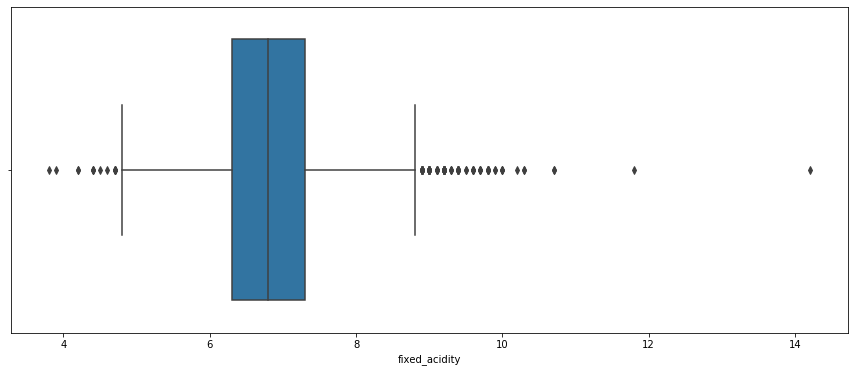

In [142]:
plt.figure(figsize=(15,6))
sns.boxplot(x=wine["fixed_acidity"])


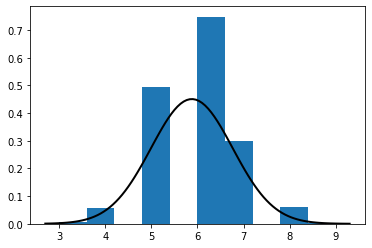

In [161]:
data=wine["quality"]
mean, std=norm.fit(data)

plt.hist(data, density=True)

xmin, xmax=plt.xlim()
x=np.linspace(xmin, xmax, 100)
p=norm.pdf(x,mean, std)
plt.plot(x,p,"k",linewidth=2)
plt.show()

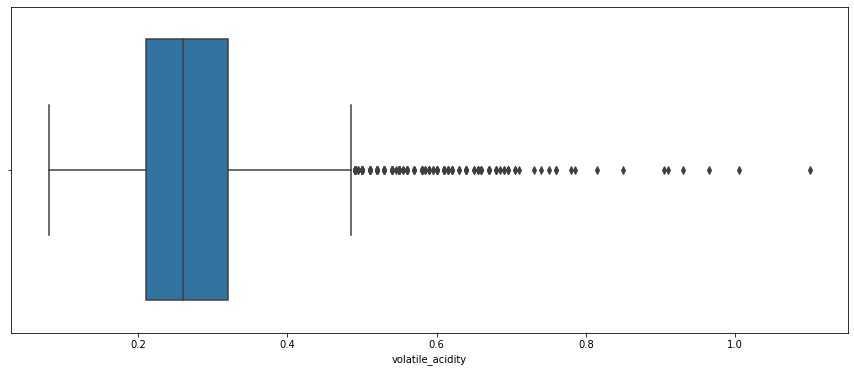

In [163]:
plt.figure(figsize=(15,6))
sns.boxplot(x=wine["volatile_acidity"])

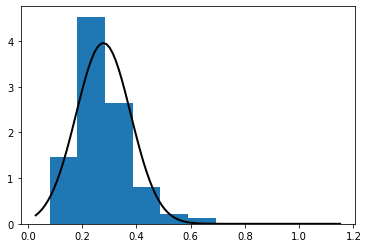

In [147]:
data=wine["volatile_acidity"]
mean, std=norm.fit(data)

plt.hist(data, density=True)

xmin, xmax=plt.xlim()
x=np.linspace(xmin, xmax, 100)
p=norm.pdf(x,mean, std)
plt.plot(x,p,"k",linewidth=2)
plt.show()

In [164]:
# Outliers

def detect_outlier(df):
    for i in df.describe().columns:
        Q1=df.describe().at["25%", i]
        Q3=df.describe().at["75%",i]
        IQR=Q3-Q1
        LTV=Q1-1.5*IQR
        UTV=Q3+1.5*IQR
        x=np.array(df[i])    # ths is like     np.array(tips["total_bill"])
        p=[]
        for j in x:
            if j<LTV or j>UTV:
                p.append("outlier")
            else:
                p.append(j)
        df[i]=p
    return df


In [165]:
detect_outlier(wine)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6
4894,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7


In [166]:
a=wine["fixed_acidity"]=="outlier"

In [179]:
b=wine["fixed_acidity"].count()
b

4898

In [180]:
c=wine.loc[a,"fixed_acidity"].count()
c

119

In [182]:
outlier_per=c/b*100
outlier_per

2.4295630869742753

In [178]:
wine.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [175]:
def perc(df):
    for i in df.describe().columns:
        a=df[i]=="outlier"
        b=df[i].count()
        c=df.loc[a,df[i]].count()
        d=[]
        d.append(c/b*100)
        
    return df

In [176]:
perc(wine)

KeyError: "None of [Float64Index([ 8.8,  9.5, 10.1,  9.9,  9.9, 10.1,  9.6,  8.8,  9.5, 11.0,\n              ...\n               9.2,  9.4, 11.8, 10.6,  9.7, 11.2,  9.6,  9.4, 12.8, 11.8],\n             dtype='float64', length=4898)] are in the [columns]"

In [192]:
df2=pd.DataFrame([["a",1], ["b",2]], columns=["letter", "number"])
df3=pd.DataFrame([["c",3,"cat"],["d",4,"dog"]], columns=["letter", "number", "animal"])
df2


,letter,number
0,a,1
1,b,2


In [193]:
df3

,letter,number,animal
0,c,3,cat
1,d,4,dog


In [196]:
pd.concat([df2,df3], axis=1)

,letter,number,letter,number,animal
0,a,1,c,3,cat
1,b,2,d,4,dog


In [ ]:
    letter number animal                                  
0   a       1      Nan
1   b       2      Nan
0   c       3      cat
1   d       4      dog

In [197]:
df4=pd.DataFrame({"custid":[1,2,3,4,5], 
                  "product":["Radio", "Radio", "Fridge", "Fridge", "Phone"]})
df5=pd.DataFrame({"custid":[3,4,5,6,7],
                  "state":["UP","UP","UP","MH","MH"]})

In [203]:
# pd.concat([df4, df5], axis=1)

pd.merge(df4, df5,on=["custid"], how="right")

,custid,product,state
0,3,Fridge,UP
1,4,Fridge,UP
2,5,Phone,UP
3,6,NaN,MH
4,7,NaN,MH


# Airline Assignmemnt -Employee, Rating and Salary

In [188]:
# Employee master

emp=pd.read_csv(r'C:\Users\umang\Documents\Work\SAS material\Edvancer\Datasets\Datasets\SAS Fundamentals\employeemaster.csv')
emp


,Employee id,Name,Date_of_joining,Profile,Date_of_termination
0,11598,Tanesha Sax,8/12/2012,Pilot,11/15/2012
1,12917,Vina Woolfolk,7/30/2006,Pilot,NaN
2,13161,Terrence Linnell,6/30/2012,Pilot,NaN
3,16526,Corrinne Mckane,5/19/2008,Pilot,NaN
4,16884,Estell Surette,5/8/2011,Pilot,8/24/2012
...,...,...,...,...,...
95,95140,Emil Mccoy,6/8/2011,Ground Staff,NaN
96,96218,Macy Kincannon,2/28/2012,Ground Staff,7/10/2012
97,97741,Ayanna Fasano,8/4/2008,Ground Staff,NaN
98,98723,Daysi Iwamoto,10/17/2006,Ground Staff,NaN


In [ ]:
rating=pd.read_csv(r'C:\Users\umang\Documents\Work\SAS material\Edvancer\Datasets\Datasets\SAS Fundamentals\Rating.csv')
sal=pd.read_csv(r'C:\Users\umang\Documents\Work\SAS material\Edvancer\Datasets\Datasets\SAS Fundamentals\Salary.csv')

In [311]:
new=pd.merge(emp, rating, on=["Employee id", "Name"], how="outer")
new

,Employee id,Name,Date_of_joining,Profile,Date_of_termination,Rating,Promotion
0,11598,Tanesha Sax,8/12/2012,Pilot,11/15/2012,NaN,NaN
1,12917,Vina Woolfolk,7/30/2006,Pilot,NaN,1.0,0.0
2,13161,Terrence Linnell,6/30/2012,Pilot,NaN,3.0,0.0
3,16526,Corrinne Mckane,5/19/2008,Pilot,NaN,2.0,0.0
4,16884,Estell Surette,5/8/2011,Pilot,8/24/2012,NaN,NaN
...,...,...,...,...,...,...,...
95,95140,Emil Mccoy,6/8/2011,Ground Staff,NaN,2.0,1.0
96,96218,Macy Kincannon,2/28/2012,Ground Staff,7/10/2012,NaN,NaN
97,97741,Ayanna Fasano,8/4/2008,Ground Staff,NaN,3.0,1.0
98,98723,Daysi Iwamoto,10/17/2006,Ground Staff,NaN,1.0,0.0


In [312]:
full=pd.merge(new, sal, on=["Employee id", "Name"], how="outer")
full

,Employee id,Name,Date_of_joining,Profile,Date_of_termination,Rating,Promotion,Current Salary/Last drawn salary
0,11598,Tanesha Sax,8/12/2012,Pilot,11/15/2012,NaN,NaN,121182
1,12917,Vina Woolfolk,7/30/2006,Pilot,NaN,1.0,0.0,114859
2,13161,Terrence Linnell,6/30/2012,Pilot,NaN,3.0,0.0,94957
3,16526,Corrinne Mckane,5/19/2008,Pilot,NaN,2.0,0.0,74061
4,16884,Estell Surette,5/8/2011,Pilot,8/24/2012,NaN,NaN,68610
...,...,...,...,...,...,...,...,...
95,95140,Emil Mccoy,6/8/2011,Ground Staff,NaN,2.0,1.0,30373
96,96218,Macy Kincannon,2/28/2012,Ground Staff,7/10/2012,NaN,NaN,42765
97,97741,Ayanna Fasano,8/4/2008,Ground Staff,NaN,3.0,1.0,47401
98,98723,Daysi Iwamoto,10/17/2006,Ground Staff,NaN,1.0,0.0,37105


In [313]:
a=full["Date_of_termination"].isna()
terminated=full.loc[~a]
terminated

,Employee id,Name,Date_of_joining,Profile,Date_of_termination,Rating,Promotion,Current Salary/Last drawn salary
0,11598,Tanesha Sax,8/12/2012,Pilot,11/15/2012,NaN,NaN,121182
4,16884,Estell Surette,5/8/2011,Pilot,8/24/2012,NaN,NaN,68610
6,20482,Theron Babcock,12/5/2008,Pilot,1/8/2011,NaN,NaN,86428
15,26477,Rocky Bankhead,12/2/2011,Pilot,5/24/2012,NaN,NaN,99781
16,27026,Deloras Terhaar,10/13/2012,Pilot,1/12/2013,NaN,NaN,70049
23,30097,Karleen Chumbley,5/8/2011,Pilot,7/9/2011,NaN,NaN,58827
26,32880,Howard Baum,1/26/2012,Pilot,1/30/2012,NaN,NaN,107532
28,33241,Jesenia Allbright,3/11/2008,Ground Staff,7/8/2009,NaN,NaN,37376
36,39216,Florencia Mckinsey,10/12/2006,Ground Staff,10/21/2006,NaN,NaN,46110
46,48461,Renda Hammonds,10/19/2012,Ground Staff,3/15/2013,NaN,NaN,77143


In [314]:
existing=full.loc[a]
existing

,Employee id,Name,Date_of_joining,Profile,Date_of_termination,Rating,Promotion,Current Salary/Last drawn salary
1,12917,Vina Woolfolk,7/30/2006,Pilot,NaN,1.0,0.0,114859
2,13161,Terrence Linnell,6/30/2012,Pilot,NaN,3.0,0.0,94957
3,16526,Corrinne Mckane,5/19/2008,Pilot,NaN,2.0,0.0,74061
5,20441,Lorilee Goodpasture,10/20/2008,Pilot,NaN,3.0,0.0,129094
7,21807,Catherin Sturm,10/9/2008,Pilot,NaN,1.0,0.0,125792
...,...,...,...,...,...,...,...,...
94,93799,Carma Spece,10/4/2008,Ground Staff,NaN,3.0,0.0,73691
95,95140,Emil Mccoy,6/8/2011,Ground Staff,NaN,2.0,1.0,30373
97,97741,Ayanna Fasano,8/4/2008,Ground Staff,NaN,3.0,1.0,47401
98,98723,Daysi Iwamoto,10/17/2006,Ground Staff,NaN,1.0,0.0,37105


In [315]:
existing["Date_of_termination"].value_counts()

Series([], Name: Date_of_termination, dtype: int64)

In [316]:
# 1.Find the number of pilots and ground staff by year of their joining

existing['year'] = pd. DatetimeIndex(existing['Date_of_joining']). year
existing

C:\Users\umang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Employee id,Name,Date_of_joining,Profile,Date_of_termination,Rating,Promotion,Current Salary/Last drawn salary,year
1,12917,Vina Woolfolk,7/30/2006,Pilot,NaN,1.0,0.0,114859,2006
2,13161,Terrence Linnell,6/30/2012,Pilot,NaN,3.0,0.0,94957,2012
3,16526,Corrinne Mckane,5/19/2008,Pilot,NaN,2.0,0.0,74061,2008
5,20441,Lorilee Goodpasture,10/20/2008,Pilot,NaN,3.0,0.0,129094,2008
7,21807,Catherin Sturm,10/9/2008,Pilot,NaN,1.0,0.0,125792,2008
...,...,...,...,...,...,...,...,...,...
94,93799,Carma Spece,10/4/2008,Ground Staff,NaN,3.0,0.0,73691,2008
95,95140,Emil Mccoy,6/8/2011,Ground Staff,NaN,2.0,1.0,30373,2011
97,97741,Ayanna Fasano,8/4/2008,Ground Staff,NaN,3.0,1.0,47401,2008
98,98723,Daysi Iwamoto,10/17/2006,Ground Staff,NaN,1.0,0.0,37105,2006


In [298]:
joinees=existing.groupby(["Profile"])["year"].value_counts()
joinees

Profile       year
Ground Staff  2009    12
              2008    11
              2012     9
              2007     8
              2011     7
              2006     6
              2010     6
              2005     3
              2013     3
Pilot         2008     6
              2011     4
              2013     4
              2007     3
              2006     2
              2009     1
              2012     1
Name: year, dtype: int64

In [299]:
full.head(1)

,Employee id,Name,Date_of_joining,Profile,Date_of_termination,Rating,Promotion,Current Salary/Last drawn salary
0,11598,Tanesha Sax,8/12/2012,Pilot,11/15/2012,NaN,NaN,121182


Find the range of old salary and new salary for all the employees.

All pilots with a rating 1, 2 and 3 get a salary hike of 20%, 12% and 8% respectively
All non-pilots with a rating 1, 2 and 3 get a salary hike of 12%, 6% and 4% respectively
All employees who are promoted get an additional 10% hike

In [317]:
# # Calculating New Salary-
# All pilots with a rating 1, 2 and 3 get a salary hike of 20%, 12% and 8% respectively
# All non-pilots with a rating 1, 2 and 3 get a salary hike of 12%, 6% and 4% respectively

conditions=[
    
(existing["Profile"]=="Pilot") & (existing["Rating"]==1),
(existing["Profile"]=="Pilot") & (existing["Rating"]==2),
(existing["Profile"]=="Pilot") & (existing["Rating"]==3),
(existing["Profile"]=="Ground Staff") & (existing["Rating"]==1),    
(existing["Profile"]=="Ground Staff") & (existing["Rating"]==2),
(existing["Profile"]=="Ground Staff") & (existing["Rating"]==3),    
        
]    
        
        
choices=[existing["Current Salary/Last drawn salary"]*1.2, 
         existing["Current Salary/Last drawn salary"]*1.12, 
         existing["Current Salary/Last drawn salary"]*1.08,
         existing["Current Salary/Last drawn salary"]*1.12, 
         existing["Current Salary/Last drawn salary"]*1.06,
         existing["Current Salary/Last drawn salary"]*1.04]

existing["New_sal"]=np.select(conditions, choices)
existing



C:\Users\umang\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Employee id,Name,Date_of_joining,Profile,Date_of_termination,Rating,Promotion,Current Salary/Last drawn salary,year,New_sal
1,12917,Vina Woolfolk,7/30/2006,Pilot,NaN,1.0,0.0,114859,2006,137830.80
2,13161,Terrence Linnell,6/30/2012,Pilot,NaN,3.0,0.0,94957,2012,102553.56
3,16526,Corrinne Mckane,5/19/2008,Pilot,NaN,2.0,0.0,74061,2008,82948.32
5,20441,Lorilee Goodpasture,10/20/2008,Pilot,NaN,3.0,0.0,129094,2008,139421.52
7,21807,Catherin Sturm,10/9/2008,Pilot,NaN,1.0,0.0,125792,2008,150950.40
...,...,...,...,...,...,...,...,...,...,...
94,93799,Carma Spece,10/4/2008,Ground Staff,NaN,3.0,0.0,73691,2008,76638.64
95,95140,Emil Mccoy,6/8/2011,Ground Staff,NaN,2.0,1.0,30373,2011,32195.38
97,97741,Ayanna Fasano,8/4/2008,Ground Staff,NaN,3.0,1.0,47401,2008,49297.04
98,98723,Daysi Iwamoto,10/17/2006,Ground Staff,NaN,1.0,0.0,37105,2006,41557.60


In [318]:
# Putting further condition of Promotion- All employees who are promoted get an additional 10% hike

condition=[
    (existing["Promotion"]==1),
     (existing["Promotion"]==0)
    
]

choices=[
    (existing["New_sal"]*1.10),
    existing["New_sal"]
]

existing["New_sal"]=np.select(condition, choices)

existing

C:\Users\umang\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Employee id,Name,Date_of_joining,Profile,Date_of_termination,Rating,Promotion,Current Salary/Last drawn salary,year,New_sal
1,12917,Vina Woolfolk,7/30/2006,Pilot,NaN,1.0,0.0,114859,2006,137830.800
2,13161,Terrence Linnell,6/30/2012,Pilot,NaN,3.0,0.0,94957,2012,102553.560
3,16526,Corrinne Mckane,5/19/2008,Pilot,NaN,2.0,0.0,74061,2008,82948.320
5,20441,Lorilee Goodpasture,10/20/2008,Pilot,NaN,3.0,0.0,129094,2008,139421.520
7,21807,Catherin Sturm,10/9/2008,Pilot,NaN,1.0,0.0,125792,2008,150950.400
...,...,...,...,...,...,...,...,...,...,...
94,93799,Carma Spece,10/4/2008,Ground Staff,NaN,3.0,0.0,73691,2008,76638.640
95,95140,Emil Mccoy,6/8/2011,Ground Staff,NaN,2.0,1.0,30373,2011,35414.918
97,97741,Ayanna Fasano,8/4/2008,Ground Staff,NaN,3.0,1.0,47401,2008,54226.744
98,98723,Daysi Iwamoto,10/17/2006,Ground Staff,NaN,1.0,0.0,37105,2006,41557.600


In [319]:

range_old_sal=existing["Current Salary/Last drawn salary"].max()-existing["Current Salary/Last drawn salary"].min()
print("range_old_sal",range_old_sal)
range_new_sal=existing["New_sal"].max()-existing["New_sal"].min()
print("range_new_sal",range_new_sal)

range_old_sal 118859
range_new_sal 179078.4


In [320]:
# $ hike

existing["$_hike"]=existing["New_sal"]-existing["Current Salary/Last drawn salary"]


C:\Users\umang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [321]:
existing

,Employee id,Name,Date_of_joining,Profile,Date_of_termination,Rating,Promotion,Current Salary/Last drawn salary,year,New_sal,$_hike
1,12917,Vina Woolfolk,7/30/2006,Pilot,NaN,1.0,0.0,114859,2006,137830.800,22971.800
2,13161,Terrence Linnell,6/30/2012,Pilot,NaN,3.0,0.0,94957,2012,102553.560,7596.560
3,16526,Corrinne Mckane,5/19/2008,Pilot,NaN,2.0,0.0,74061,2008,82948.320,8887.320
5,20441,Lorilee Goodpasture,10/20/2008,Pilot,NaN,3.0,0.0,129094,2008,139421.520,10327.520
7,21807,Catherin Sturm,10/9/2008,Pilot,NaN,1.0,0.0,125792,2008,150950.400,25158.400
...,...,...,...,...,...,...,...,...,...,...,...
94,93799,Carma Spece,10/4/2008,Ground Staff,NaN,3.0,0.0,73691,2008,76638.640,2947.640
95,95140,Emil Mccoy,6/8/2011,Ground Staff,NaN,2.0,1.0,30373,2011,35414.918,5041.918
97,97741,Ayanna Fasano,8/4/2008,Ground Staff,NaN,3.0,1.0,47401,2008,54226.744,6825.744
98,98723,Daysi Iwamoto,10/17/2006,Ground Staff,NaN,1.0,0.0,37105,2006,41557.600,4452.600


In [274]:
# 3.Find the number of employees by rating levels. 

existing.groupby(["Profile"])["Rating"].value_counts()

Profile       Rating
Ground Staff  3.0       26
              1.0       21
              2.0       15
Pilot         1.0        8
              3.0        7
              2.0        2
Name: Rating, dtype: int64

In [275]:
# How many of each profile have been promoted?

existing.groupby(existing["Profile"])["Promotion"].value_counts()

Profile       Promotion
Ground Staff  0.0          57
              1.0           5
Pilot         0.0          16
              1.0           1
Name: Promotion, dtype: int64

In [322]:
# 4.Find various statistics (mean, median, stdev, 25th percentile and 75th percentile) of % hike and $ hike for all the employees. 
# Comment whether the % hike and $ hike seemingly follow a normal distribution or a skewed distribution.

existing["%_hike"]=existing["$_hike"]/existing["Current Salary/Last drawn salary"]*100




C:\Users\umang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [325]:
existing

existing.describe()

,Employee id,Rating,Promotion,Current Salary/Last drawn salary,year,New_sal,$_hike,%_hike
count,86.000000,79.000000,79.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,55748.872093,2.050633,0.075949,67890.744186,2009.127907,66872.009093,-1018.735093,0.581395
std,24168.732875,0.890098,0.266610,28553.137358,2.253345,36526.874317,29232.331350,30.569583
min,12917.000000,1.000000,0.000000,30373.000000,2005.000000,0.000000,-145758.000000,-100.000000
25%,34397.000000,1.000000,0.000000,47078.500000,2007.250000,47342.780000,2425.420000,4.000000
50%,58706.500000,2.000000,0.000000,61326.000000,2009.000000,62019.600000,4148.100000,6.000000
75%,76796.000000,3.000000,0.000000,77689.000000,2011.000000,80990.260000,7898.053000,12.000000
max,99573.000000,3.000000,1.000000,149232.000000,2013.000000,179078.400000,29846.400000,23.200000


In [327]:
existing.loc[existing["$_hike"]<0]

# Below are the ids who dont have the hike or the promotion coz may be they are new employees and 
# dont fall in the cylce of promotion yet

,Employee id,Name,Date_of_joining,Profile,Date_of_termination,Rating,Promotion,Current Salary/Last drawn salary,year,New_sal,$_hike,%_hike
9,22905,Ed Stroop,3/18/2013,Pilot,NaN,NaN,NaN,145758,2013,0.0,-145758.0,-100.0
10,23219,Allen Pedro,1/26/2013,Pilot,NaN,NaN,NaN,92590,2013,0.0,-92590.0,-100.0
13,26014,Claudie Zane,4/14/2013,Pilot,NaN,NaN,NaN,106338,2013,0.0,-106338.0,-100.0
22,29357,Inge Randle,5/1/2013,Pilot,NaN,NaN,NaN,124610,2013,0.0,-124610.0,-100.0
32,35670,Tifany Grogg,4/3/2013,Ground Staff,NaN,NaN,NaN,38798,2013,0.0,-38798.0,-100.0
56,62042,Edelmira Detweiler,2/25/2013,Ground Staff,NaN,NaN,NaN,79281,2013,0.0,-79281.0,-100.0
78,77383,Risa Pier,1/5/2013,Ground Staff,NaN,NaN,NaN,38552,2013,0.0,-38552.0,-100.0


In [329]:
# we can create 1 more dataset of the employees who are eligible for promotion

q=existing["Rating"].isna()

existing.loc[q]



,Employee id,Name,Date_of_joining,Profile,Date_of_termination,Rating,Promotion,Current Salary/Last drawn salary,year,New_sal,$_hike,%_hike
9,22905,Ed Stroop,3/18/2013,Pilot,NaN,NaN,NaN,145758,2013,0.0,-145758.0,-100.0
10,23219,Allen Pedro,1/26/2013,Pilot,NaN,NaN,NaN,92590,2013,0.0,-92590.0,-100.0
13,26014,Claudie Zane,4/14/2013,Pilot,NaN,NaN,NaN,106338,2013,0.0,-106338.0,-100.0
22,29357,Inge Randle,5/1/2013,Pilot,NaN,NaN,NaN,124610,2013,0.0,-124610.0,-100.0
32,35670,Tifany Grogg,4/3/2013,Ground Staff,NaN,NaN,NaN,38798,2013,0.0,-38798.0,-100.0
56,62042,Edelmira Detweiler,2/25/2013,Ground Staff,NaN,NaN,NaN,79281,2013,0.0,-79281.0,-100.0
78,77383,Risa Pier,1/5/2013,Ground Staff,NaN,NaN,NaN,38552,2013,0.0,-38552.0,-100.0


In [333]:
eligible=existing[~q]
eligible["Rating"].isna().sum()

0

In [334]:
eligible.describe()

,Employee id,Rating,Promotion,Current Salary/Last drawn salary,year,New_sal,$_hike,%_hike
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,57187.506329,2.050633,0.075949,65983.253165,2008.784810,72797.376987,6814.123823,9.493671
std,23981.547458,0.890098,0.266610,26748.108354,2.017048,31891.506492,6329.965797,5.478708
min,12917.000000,1.000000,0.000000,30373.000000,2005.000000,32654.360000,1410.120000,4.000000
25%,35536.000000,1.000000,0.000000,47186.000000,2007.000000,53048.320000,2678.700000,4.000000
50%,61885.000000,2.000000,0.000000,60207.000000,2009.000000,65307.840000,4501.860000,8.000000
75%,77232.500000,3.000000,0.000000,74924.500000,2011.000000,82499.120000,8313.120000,12.000000
max,99573.000000,3.000000,1.000000,149232.000000,2012.000000,179078.400000,29846.400000,23.200000


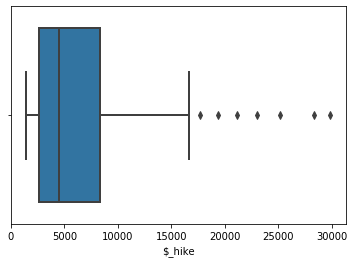

In [337]:
# Comment whether the % hike and $ hike seemingly follow a normal distribution or a skewed distribution.

import scipy.stats as stats
import seaborn as sns

sns.boxplot(x=eligible["$_hike"], linewidth=2)

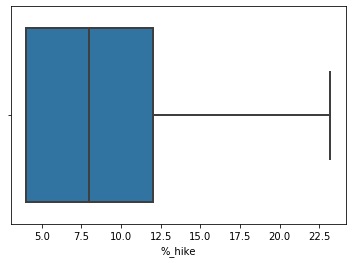

In [338]:
sns.boxplot(x=eligible["%_hike"], linewidth=2)

Both $_hike and %_hike are postively skewed

In [341]:
Pilot=eligible.loc[eligible["Profile"]=="Pilot"]
Ground=eligible.loc[eligible["Profile"]=="Ground Staff"]

In [357]:
# 2.Find the range of old salar and new salary for all Pilot and Ground staff seperately


profi=eligible.groupby(["Profile"])

a=profi["New_sal"].max()
print(a)
b=profi["New_sal"].min()
print(b)
c=profi["Current Salary/Last drawn salary"].max()
d=profi["Current Salary/Last drawn salary"].min()

Profile
Ground Staff     86864.624
Pilot           179078.400
Name: New_sal, dtype: float64
Profile
Ground Staff    32654.36
Pilot           65417.76
Name: New_sal, dtype: float64


In [358]:
# Range of new and old salary by profile

new_sal_range=a-b
print(new_sal_range)
old_sal_range=c-d
print(old_sal_range)

Profile
Ground Staff     54210.264
Pilot           113660.640
Name: New_sal, dtype: float64
Profile
Ground Staff    49331
Pilot           88660
Name: Current Salary/Last drawn salary, dtype: int64


In [359]:
# 4.Find various statistics (mean, median, stdev, 25th percentile and 75th percentile) of % hike and $ hike for all the Pilot employees.

Pilot.describe()

,Employee id,Rating,Promotion,Current Salary/Last drawn salary,year,New_sal,$_hike,%_hike
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,24672.294118,1.941176,0.058824,105733.588235,2008.588235,121492.955765,15759.367529,14.752941
std,6239.937818,0.966345,0.242536,24667.668052,1.905873,29841.575193,7674.503743,5.730414
min,12917.000000,1.000000,0.000000,60572.000000,2006.000000,65417.760000,4845.760000,8.000000
25%,21807.000000,1.000000,0.000000,88378.000000,2007.000000,102553.560000,9226.800000,8.000000
50%,26432.000000,2.000000,0.000000,109158.000000,2008.000000,119453.600000,14619.800000,18.800000
75%,28817.000000,3.000000,0.000000,122385.000000,2011.000000,137830.800000,21111.648000,20.000000
max,33001.000000,3.000000,1.000000,149232.000000,2012.000000,179078.400000,29846.400000,20.000000


In [360]:
Ground.describe()

,Employee id,Rating,Promotion,Current Salary/Last drawn salary,year,New_sal,$_hike,%_hike
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,66102.967742,2.080645,0.080645,55083.967742,2008.838710,59445.363452,4361.395710,8.051613
std,18701.621562,0.874003,0.274512,13933.866236,2.058119,14996.429434,2715.144218,4.466111
min,34224.000000,1.000000,0.000000,30373.000000,2005.000000,32654.360000,1410.120000,4.000000
25%,49698.000000,1.000000,0.000000,44732.750000,2007.000000,48440.820000,2485.330000,4.000000
50%,67369.500000,2.000000,0.000000,53592.000000,2009.000000,56167.920000,3154.980000,6.000000
75%,81005.000000,3.000000,0.000000,66650.250000,2010.750000,70188.465000,5866.920000,12.000000
max,99573.000000,3.000000,1.000000,79704.000000,2012.000000,86864.624000,16357.624000,23.200000


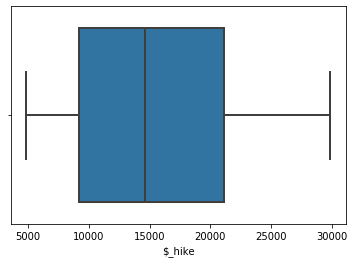

In [361]:
# Comment whether the % hike and $ hike seemingly follow a normal distribution or a skewed distribution

sns.boxplot(x=Pilot["$_hike"], linewidth=2)

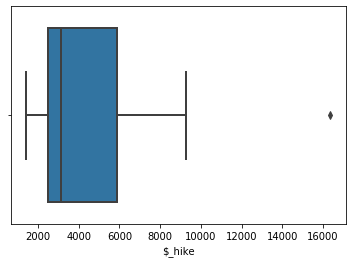

In [362]:
sns.boxplot(x=Ground["$_hike"], linewidth=2)

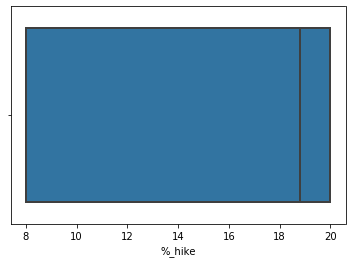

In [363]:
sns.boxplot(x=Pilot["%_hike"], linewidth=2)

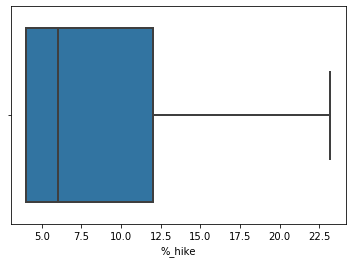

In [364]:
sns.boxplot(x=Ground["%_hike"], linewidth=2)

In [365]:
# range of old salary and new salary by Ratings

e=eligible.groupby(["Rating"])["New_sal"].max()
f=eligible.groupby(["Rating"])["New_sal"].min()
g=eligible.groupby(["Rating"])["Current Salary/Last drawn salary"].max()
h=eligible.groupby(["Rating"])["Current Salary/Last drawn salary"].min()

rating_range_new_sal=e-f
print(rating_range_new_sal)
rating_range_old_sal=g-h
print(rating_range_old_sal)

Rating
1.0    142807.20
2.0     86799.24
3.0    102758.40
Name: New_sal, dtype: float64
Rating
1.0    116847
2.0     76282
3.0     93841
Name: Current Salary/Last drawn salary, dtype: int64


In [367]:
# range of old salary and new salary by Promotees

i=eligible.groupby(["Promotion"])["New_sal"].max()
j=i=eligible.groupby(["Promotion"])["New_sal"].min()
k=i=eligible.groupby(["Promotion"])["Current Salary/Last drawn salary"].max()
l=k=i=eligible.groupby(["Promotion"])["Current Salary/Last drawn salary"].min()

Promoted_range_new_sal=i-j
print(Promoted_range_new_sal)
Promoted_range_old_sal=k-l
print(Promoted_range_old_sal)

Promotion
0.0   -1848.360
1.0   -5041.918
dtype: float64
Promotion
0.0    0
1.0    0
Name: Current Salary/Last drawn salary, dtype: int64


# Umang's case study

In [125]:
new=pd.read_excel(r'Desktop\Book1.xlsx')
new

,Owner,Shops,Status
0,O1,A1,Closed
1,O1,A2,Open
2,O1,A3,Closed
3,O2,B1,Open
4,O2,B2,Closed
5,O3,C1,Closed
6,O3,C2,Closed
7,O3,C3,Closed
8,O4,D1,Mani
9,O4,D2,Closed


In [39]:
pd.crosstab(new["Owner"], new["Status"])

Status,Closed,Open
Owner,,
O1,2,1
O2,1,1
O3,3,0


In [37]:
a=new[new["Owner"]=="O3"].count()
a


Owner     3
Shops     3
Status    3
ct        0
dtype: int64

In [43]:
b=pd.DataFrame()
b=new.loc[:,["Owner","Status"]]
b

,Owner,Status
0,O1,Closed
1,O1,Open
2,O1,Closed
3,O2,Open
4,O2,Closed
5,O3,Closed
6,O3,Closed
7,O3,Closed


In [47]:
a=new["Owner"].value_counts()
a

O3    3
O1    3
O2    2
Name: Owner, dtype: int64

In [54]:
for i in new["Owner"]:
    print(i, new["Status"])
#     if "Status"=="Closed":
#         new["a[i]"]=new["a[i]"]+1
#     else new["a[i]"]=new["a[i]"]+0

O1 0    Closed
1      Open
2    Closed
3      Open
4    Closed
5    Closed
6    Closed
7    Closed
Name: Status, dtype: object
O1 0    Closed
1      Open
2    Closed
3      Open
4    Closed
5    Closed
6    Closed
7    Closed
Name: Status, dtype: object
O1 0    Closed
1      Open
2    Closed
3      Open
4    Closed
5    Closed
6    Closed
7    Closed
Name: Status, dtype: object
O2 0    Closed
1      Open
2    Closed
3      Open
4    Closed
5    Closed
6    Closed
7    Closed
Name: Status, dtype: object
O2 0    Closed
1      Open
2    Closed
3      Open
4    Closed
5    Closed
6    Closed
7    Closed
Name: Status, dtype: object
O3 0    Closed
1      Open
2    Closed
3      Open
4    Closed
5    Closed
6    Closed
7    Closed
Name: Status, dtype: object
O3 0    Closed
1      Open
2    Closed
3      Open
4    Closed
5    Closed
6    Closed
7    Closed
Name: Status, dtype: object
O3 0    Closed
1      Open
2    Closed
3      Open
4    Closed
5    Closed
6    Closed
7    Closed
Name: Status

In [22]:
new.groupby(["Owner"])["Status"].value_counts()


Owner  Status
O1     Closed    2
       Open      1
O2     Closed    1
       Open      1
O3     Closed    3
Name: Status, dtype: int64

In [128]:
new

,Owner,Shops,Status
0,O1,A1,Closed
1,O1,A2,Open
2,O1,A3,Closed
3,O2,B1,Open
4,O2,B2,Closed
5,O3,C1,Closed
6,O3,C2,Closed
7,O3,C3,Closed
8,O4,D1,Mani
9,O4,D2,Closed


In [130]:
a=(new["Status"]=="Closed") o (new["Status"]=="Mani")


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [127]:
b=new.loc[a,"Owner"].value_counts()
b

Series([], Name: Owner, dtype: int64)

In [108]:
c=new["Owner"].value_counts()
c

O4    5
O3    3
O1    3
O2    2
Name: Owner, dtype: int64

In [109]:
b==c

O4    False
O3     True
O1    False
O2    False
Name: Owner, dtype: bool

In [78]:
print(b)
print(c)

O3    3
O1    2
O2    1
Name: Owner, dtype: int64
O3    3
O1    3
O2    2
Name: Owner, dtype: int64


# Marketing Campaign

In [8]:
import pandas as pd
bank=pd.read_csv(r'C:\Users\umang\Documents\Work\SAS material\Edvancer\Datasets\Datasets\Logistic Regression\bank-full.csv', sep=";")

In [10]:
# Make a quick summary of variable names and variable types to check if types have been assigned correctly

bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [11]:
bank.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [26]:
# Make sure that none of the values for categorical variables are truncated 

bank.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [27]:
#  Prepare individual variable summary of the dataset 

bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [33]:
# Get output of the numeric summary stats [mean, std only] in a dataset for all numeric vars. 
# Output should contain vars in rows and stats in columns

a=bank.describe().agg(["mean", "std"])
a

,age,balance,day,duration,campaign,pdays,previous
mean,5686.944372,18209.254736,5664.016112,6405.836362,5660.857733,5777.290822,5686.110471
std,15970.150202,37605.126556,15979.397159,15767.149701,15980.684949,15936.427695,15970.756013


In [35]:
a.transpose()

,mean,std
age,5686.944372,15970.150202
balance,18209.254736,37605.126556
day,5664.016112,15979.397159
duration,6405.836362,15767.149701
campaign,5660.857733,15980.684949
pdays,5777.290822,15936.427695
previous,5686.110471,15970.756013


In [146]:
# Get output of individual frequency summary for character variables and combine those output datasets to make a combined table 

b=bank["job"].value_counts()

c=bank.age.value_counts()

b

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [147]:
b.index


Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object')

In [148]:
new1=pd.DataFrame({"Variable":"job",
    "Category":[i for i in b.index],
                 "Frequency":[i for i in b.values]})

new2=pd.DataFrame({"Variable":"age",
    "Category":[i for i in c.index],
                 "Frequency":[i for i in c.values]})




In [155]:
new=pd.DataFrame()
new=new.append([new1,new2])
new

,Variable,Category,Frequency
0,job,blue-collar,9732
1,job,management,9458
2,job,technician,7597
3,job,admin.,5171
4,job,services,4154
...,...,...,...
72,age,90,2
73,age,92,2
74,age,93,2
75,age,95,2


In [99]:
new3

,Variable,Category,Frequency


In [46]:
c=bank.dtypes=="object"
c

age          False
job           True
marital       True
education     True
default       True
balance      False
housing       True
loan          True
contact       True
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y             True
dtype: bool

In [92]:
new3=pd.DataFrame()
new3

""


In [214]:
p=[]
def table(df):
    for i in df.columns:
        if df[i].dtypes=="object":
            p.append(i)
        
    return p


        


In [216]:
table(bank)

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [217]:
p

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [298]:
new3=pd.DataFrame()


def n2(df):
    for i in df.columns:
        value=pd.DataFrame({"Variable": i ,
                          "Category":[j for j in df[i].value_counts().index],
                          "Frequency":[k for k in df[i].value_counts().values]})
        new4=new3.append(value)
        
    
    

        
    return new4
   
    
n2(bank)

,Variable,Category,Frequency
0,balance_out1,0,43742
1,balance_out1,1,1469


In [299]:
new3=pd.DataFrame()

for i in bank.columns:
    value=pd.DataFrame({"Variable": i ,
                          "Category":[j for j in bank[i].value_counts().index],
                          "Frequency":[k for k in bank[i].value_counts().values]})
        
    new3=new3.append(value)
        
    
    

        
new3

,Variable,Category,Frequency
0,age,32,2085
1,age,31,1996
2,age,33,1972
3,age,34,1930
4,age,35,1894
...,...,...,...
1,pdays_out,1,3605
0,prev_out,0,43742
1,prev_out,1,1469
0,balance_out1,0,43742


In [219]:
# Check % of outlier values in each numeric var. Consider a value to be an outlier if it falls beyond the range [mean-2*std, mean+2*std]

bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [270]:
import numpy as np

def outlier(df):
    for i in df.describe().columns:
        mean=df.describe().at["mean",i]
        std=df.describe().at["std",i]
        lower_range=mean-(2*std)
        upper_range=mean+(2*std)
        
        x=np.array(df[i])
        p=[]
        for j in x:
            if j<lower_range or j>upper_range:
                p.append(1)
            else:
                p.append(0)
                
        if i=="age":
            df["age_out"]=p
        elif i=="balance":
            df["balance_out"]=p
        elif i=="day":
            df["day_out"]=p
        elif i=="duration":
            df["duration_out"]=p
        elif i=="campaign":
            df["camp_out"]=p
        elif i=="pdays":
            df["pdays_out"]=p
        else:
            df["prev_out"]=p
     
    return df

outlier(bank)
                           
                           


,age,job,marital,education,default,balance,housing,loan,contact,day,...,y,new,i_out,age_out,balance_out,day_out,duration_out,camp_out,pdays_out,prev_out
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,no,0,0,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,no,0,0,0,0,0,0,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,no,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,no,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,no,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,yes,0,0,0,0,0,1,0,0,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,yes,0,0,1,0,0,0,0,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,yes,0,0,1,0,0,1,0,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,no,0,0,0,0,0,0,0,0,0


In [282]:
bank["prev_out"].mean()

0.03249209263232399

In [291]:
final=pd.DataFrame()

l=["age_out","balance_out","day_out","duration_out","camp_out","pdays_out","prev_out"]

for i in l:
    new=pd.DataFrame({"variable":i,
                     "%_outlier":[bank[i].mean()]})
    
    final=final.append(new)

final


,variable,%_outlier
0,age_out,0.022295
0,balance_out,0.032492
0,day_out,0.000000
0,duration_out,0.046405
0,camp_out,0.039570
0,pdays_out,0.079737
0,prev_out,0.032492
